In [ ]:
Model description and explanation, plots

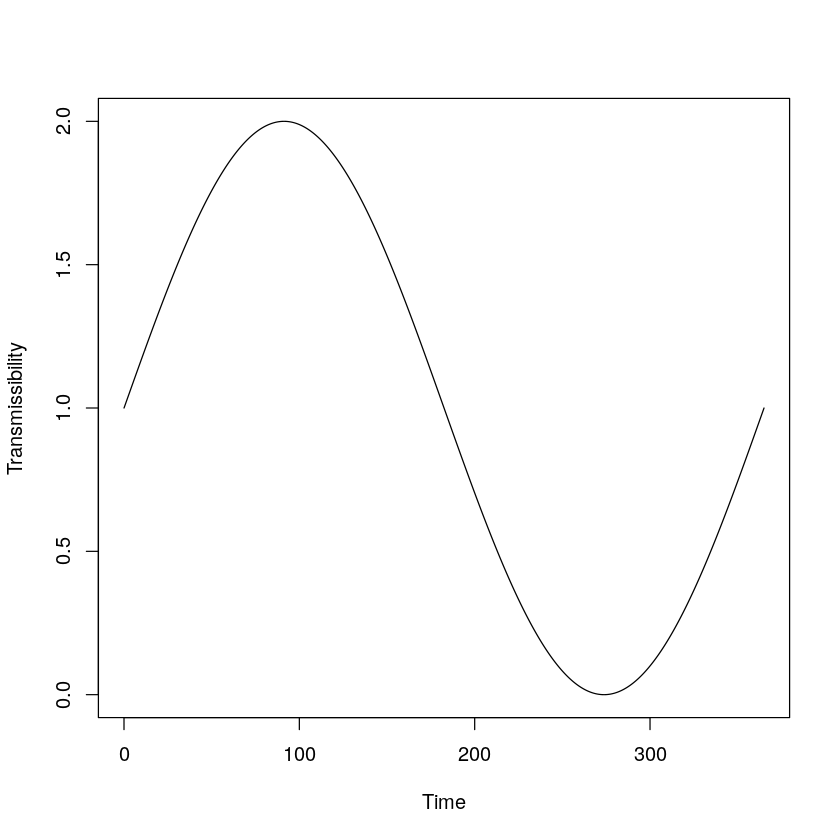

In [9]:
x=seq(0,365,length.out = 10000)
plot(x,sin(2*pi*x/365)+1,xlab="Time",ylab="Transmissibility","s")

# Basic Model

## Model
  $\frac{dS}{dt} = \nu  N - \frac{\beta  I  S} {N} - \mu S\\
  \frac{dE}{dt}=  \frac{\beta  I  S} {N} - (\sigma + \mu) E\\
  \frac{dI}{dt} = \sigma  E - (\alpha + \mu + \gamma) I\\
  \frac{dR}{dt} = \gamma I - \mu R $  
Hill Function not modelled in this notebook , but may add later  
$H=(1 - m\times \frac{I^3} {k^3 + I^3}) $
 
$\beta = c_r   \times  \epsilon \times  \frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h} $  
$\beta=$ number contacts per unit time x probability of disease transmission per contact  
$[\beta]=[c_r]=individual/(individual x day) \times unitless $


Model is frequency dependent - chapter 2 keeling and rohani and Bjornstaad 2002 dynamics of measles
#### Climate dependence
$\beta(C) = c_r(C)   \times  \epsilon \times  \frac{\frac{1}{b(C)}(1-e^{-b(C)d})}{\frac{1}{b(C)}(1-e^{-b(C)d})+h} $ 

 Guinea pig transmission study is evidence that climate mediates transmission


Decision to assume d constant because the effect of this is minimal 

$\beta(c_R(C),b(C))$
 ##### Contact Rate

c_R(C)=maximum_contact_rate$\times e^{\frac{-(Combined\_Climate - Climate\_Maximum\_Contact\_Rate) ^ 2}{ 2 s ^ 2}}$  
  This is based on a normal distribution scaled up so the maximum is the maximum contact rate.  
s = (quantile_cr_upper - ClimateMaximumContactRate) OR s = -(quantile_cr_lower - Climate_Maximum_Contact_Rate)   depending on where Climate_Maximum_Contact_Rate lies. Specificially lower quantile is used when Climate_Maximum_Contact_Rate is closer to the upper quartile than the lower quartile, and vice versa. 
 ##### Mortality Rate 

$b(C)=-q(C)$    
$q(C)= a Climate ^ 2 + b Climate + c$  

$a=\frac {minimum\_survival - maximum\_survival}{(Climate\_minimum\_survival - Climate\_maximum\_survival) ^ 2}$  
 
$b=-2 \times Climate\_maximum\_survival(\frac {minimum\_survival - maximum\_survival}{(Climate\_minimum\_survival - Climate\_maximum\_survival) ^ 2})$  

 $c=\frac {minimum\_survival - maximum\_survival}{(Climate\_minimum\_survival - Climate\_maximum\_survival) ^ 2} \times Climate\_maximum\_survival ^2 + maximum\_survival$ 

this is just from substituting the vertex and another point (chosen to be the point of minimum survival here) into $y = a(x – h)2 + k$ i.e.  $ minimum\_survival= a(Climate\_minimum\_survival – Climate\_maximum\_survival)2 + maximum\_survival$ and solving for a. $ y= a(x – Climate\_maximum\_survival)2 + maximum\_survival$ was then rearranged to find b and c.   

The value of Climate_minimum_survival is either the lower or upper end of range_q. The function is symmetrical so the lower end is used when the Climate_maximum_survival is closer to the upper end and vice versa. 




# Beta
## Basis is valle 2013 paper  
Simplified from an spatially and age structured model  
Force of Infection:  
$\delta=$ number of contacts per unit time X probability of disease transmission per contact X proportion of contacts that are infected  
$\delta= c_r   \times  \epsilon \times \tau \times  (1-e^{-\zeta d}) \times \frac{I}{N}$  

$[1-e^{\zeta d}]=[1]-e^{[{time/time}]}=$unitless  
$[\delta]=[c_r]$=individual/(individual x day)  

Transmissibility:  
$\beta = c_r   \times  \epsilon \times \tau \times  (1-e^{-\zeta d}) $  
$\beta=$ number of contacts per unit time X probability of disease transmission per contact  
$[\beta]=[c_r]=$individual/(individual x day)        

$\epsilon \times \tau \times  (1-e^{-\zeta d})$: probability of disease transmission per contact between I and S.  
$(1-e^{-\zeta d})$: probability of transmission based on the average duration of contacts and the number of transmission events per unit time. not sure why exponential . scaled between 0 and 1.

## Modification

- I have ignored susceptibility of susceptible ($\tau$) as my model does not have age structure and there is not likely to be residual immunity      
- I have removed the age and spatial structure
- I have kept $\epsilon$ in for now. It would make sense that there is a maximum possibly infectivity (not 100% of contacts will cause infection. 
- Modify "probability of disease transmission per contact"  

    1. find expected viral titre at time duration d if shedding occurs at rate a
    2. convert this into a (dimensionless) probability of infection. probability needs:
        - to increase as d increases( as contact longer, infection more likely)
        - to decreases as rate of decay increases (i.e s(growth rate) gets lower)(or b (rate of decay)=-s increases) 


### Basic equation:    

$\beta = c_r   \times  \epsilon \times  probability $  
$\beta=$ number of contacts per unit time x probability of disease transmission per contact  
$[\beta]=[c_r]=$individual/(individual x day) 


### Finding expected viral titre for time duration d if shedding occurs at rate a:  

$\frac{dV}{dd}=a-bV$   
Shedding occurs at a constant rate, amount of decay (bV) depends on the amount of virus that is present.  
$[\frac{dV}{dd}] =titre/(time x individual)-\frac { titre}{individual}\frac{1}{time}=titre/(individual  x time)$  
$V=\frac{a}{b}+ce^{-bd}$  
$[V]=\frac { titre}{time  x  individual}/ \frac{1}{time}+[c]e^{time/time}=\frac{titre}{individual}$  
units of c must be titre/individual   

initially t=0, V = 0:   
- $V=\frac{a}{b}+ce^{-b0}=0$  
- $-\frac{a}{b}=c$  

$V=\frac{a}{b}+-\frac{a}{b}e^{-bd}=\frac{a}{b}(1-e^{-bd})$   
b!=0

### Convert into a probability of infection:

$probability=\frac{\frac{a}{b}(1-e^{-bd})}{\frac{a}{b}(1-e^{-bd})+ah}=\frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h}$   

ah is the amount of virus shed in the time needed for transmission to occur
$[probability]=\frac{\frac{titre/(individual x time)}{1/time} [1-e^{-time/time}]}{\frac{titre/(individual x time)}{1/time} [1-e^{-time/time}]+[time x titre/(individual x time) ]}=\frac{titre/(individual x time)x time [1-e^{[-1]}]}{titre/(individual x time)x time [1-e^{[-1]}]+titre/(individual) }=\frac{titre/(individual)}{titre/(individual) +titre/(individual)}=unitless$

### Mechanistic interpretation of this :
  
#### why is there a plateau in V as duration of contact increases?
- $\frac{dV}{dd}=a-bV$  - both a and b are positive, so $\frac{dV}{dd}$ is decreasing so it will eventually reach 0 (this will be a stable fixed point). 
- Alternatively d and b are both positive so as d increases, $e^{-bd}$ tends to 0 and $\frac{a}{b}(1-e^{-bd})$  increases but tends to $\frac{a}{b}$. 
- why biologically?
    - increasing the duration of contact means that more shedding happens overall (a), so V increases
    - however as the duration of contact increases, there is also more decay of the virus.
    - a is not dependent on V but b is. The higher V is, the more the decay rate has to "act on".
    - the plateau is at V=a/b, where shedding balances decay
    - ( we are assuming that b is always positive. i.e. there is always decay rather than growth)
    

#### what does $\frac{a}{b}(1-e^{-bd})$ mean?  
- a/b is the maximum Viral titre (i.e where the plateau is) 
- b is the rate of decay per unit time (per day for example). so db is the rate of decay over the length of time that contact is occuring. 
- -bd because b is a decay so causes V to decrease
- $e^{-bd}$ is a measure of the how much V is reduced from the maximum by between 0 and 1 (proportion) based on the rate of decay and contact duration.
- so the proportion of the maximum V is $1-e^{-bd}$.
- this is multiplied by the maximum V (a/b -shedding rate x time to decay) to find the viral titre that is attained at this duration of time
- so $\frac{a}{b}(1-e^{-bd})$ is the maximum V multiplied 1- the proportion that V is reduced from the maximum based on the duration of time of contact and the decay rate.

#### why is $\frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h} $ used instead of $\frac{a}{b}(1-e^{-bd})$?  
-  $\frac{a}{b}(1-e^{-bd})$ is the viral titre per individual. This needs to be converted to a probability of infection. This is acheived by dividing it by itself +ah (where h is the mean duration of contact required for an infection to occur ($1/\zeta$)).
- ah is the amount of virus shed over time h (so an estimate of the amount of virus needed to be shed needed to cause infection). assuming d incorporates only shedding rate and not decay.
-  so $\frac{\frac{a}{b}(1-e^{-bd})}{\frac{a}{b}(1-e^{-bd})+ah} $ is a way of comparing the viral titre required for transmission with the actual viral titre. while keeping between 0 and 1. If ah increases then less transmission occurs.
- this can be simplified because a cancels
- still not fully sure how this works


#### what do $\frac{1}{b}(1-e^{-bd})$ and $\frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h} $  actually mean?
- 1/b is the expected survival time of virus particles. the survival time is reduced by the proportion $e^-{bd}$ so the new expected survival time is  $\frac{1}{b}(1-e^{-bd})$.
- This is divided by itself + h, where h is the estimated time needed for infection. So this is a way of comparing survival time with time needed for an infection to occur.



### potential issues
- this assumes that infection probability per contact is determined by viral titre per infected individual in the environment and that $\frac{dV}{dd}=a-bV$. It seems likely that the change viral titre in the environment is determined by the shedding rate and the rate of decay multiplied by amount of virus. However how this corresponds to infection is more uncertain and this is definitely a simplification of the processes that lead to infection. It assumes that viral load is important for the likelihood of infection (true? look for evidence) but it also assumes that fomites are the major cause of viral transmission, which is unlikely (ref). Respiratory droplet contact with mucus membranes are likely to be a key source of infection and aerosol transmission may play a role. These are unlikely to be described by the dynamics described here. 
    - Respiratory droplets- role of humidity? - but mostly just the closeness and time of contact. probably proportional to the overall duration of contact.


### overall equation :
$\beta = c_r   \times  \epsilon \times  \frac{\frac{1}{b}(1-e^{-bd})}{\frac{1}{b}(1-e^{-bd})+h} $  
$\beta=$ number contacts per unit time x probability of disease transmission per contact 
$[\beta]=[c_r]=individual/(individual x day) \times unitless $

### Climate dependence:
$\beta = c_r(C)   \times  \epsilon \times  \frac{\frac{1}{b(C)}(1-e^{-b(C)d(C)})}{\frac{1}{b(C)}(1-e^{-b(C)d(C)})+h} $  

### Parameters
day is the unit of time here.   
$c_r$ is contact rate per unit time  (individuals/(individual x time)   
$\epsilon$ is proportion of contacts that can cause transmission  
$\tau$ is the susceptibility of the susceptible.  
$\zeta$ is the number of transmission events per unit time (1/time)  
d is average contact duration of a contact (time)     
S is no of susceptibles  (individuals)   
I is no of infectives     (individuals)   
N is pop size (individuals)  
V is the net amount of virus per individual shedding (titre/individual)  
a is the amount of virus shed per individual per unit time (titre/(time x individual)  
b is the rate of decay of the virus (1/time)  
h is the expected duration of contact needed for tramsmission (time) (inverse of $\zeta$)



### How does beta vary with parameter values

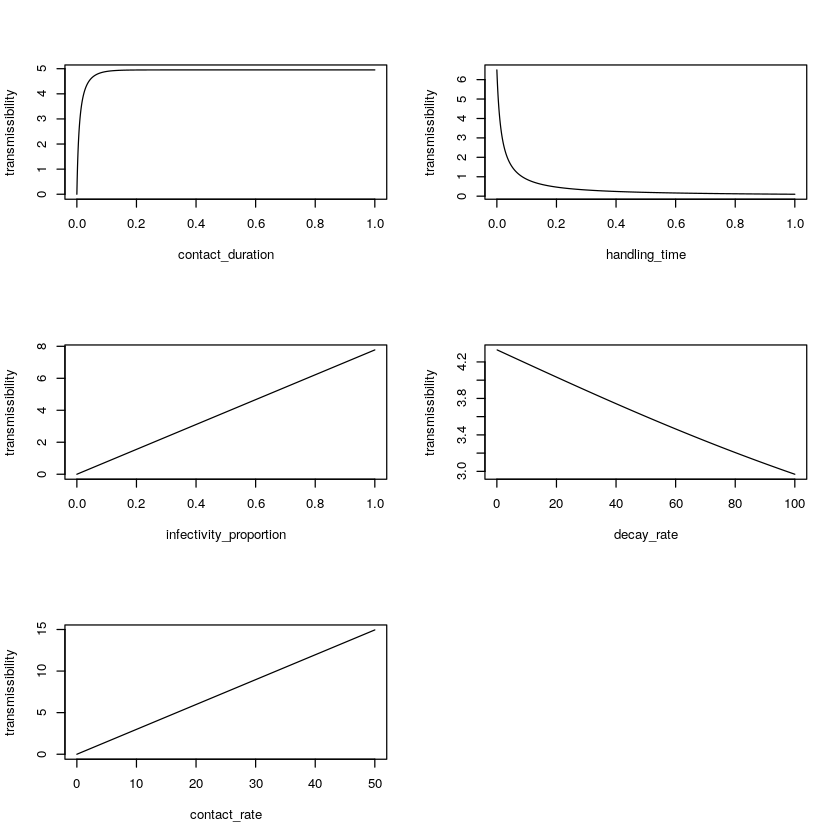

In [6]:
beta <-function(c_r,b,d,h,epsilon){
    return(c_r * epsilon *  (( (1 / b) * (1 - exp(- b * d)))/(( 1 / b) * (1 - exp(- b * d)) + h)))
}
             
#beta(c_r,b,d,h,epsilon)                                                 

parms = list(
contact_duration= 0.5 / 24,  #units -time(days)
handling_time=0.25 / 24, #days
infectivity_proportion=0.5, # maximum possibly transmissibility . not all contacts. eg in school
decay_rate= 30,  #decay (1/day)
contact_rate= 13
) #individuals/individual/day  
   
par(mfrow = c(3, 2))
for (i in 1:(length(parms))) {
  parmschange<- parms 
    if (i < 4) {
       x <- seq(0.000, 1, length.out = 1000)
        }
   if (i == 4){
        x <- seq(0.000, 100, length.out = 1000)
        }
   if (i == 5){
        x <- seq(0.000, 50, length.out = 1000)
        }

    parmschange[[i]] <- x
    transmissibility = beta(c_r= parmschange[["contact_rate"]],b= parmschange[["decay_rate"]],d= parmschange[["contact_duration"]],h= parmschange[["handling_time"]],epsilon= parmschange[["infectivity_proportion"]])
    
    plot(x,transmissibility, type = "l", xlab = names(parms[i]))
}




# Climate and beta:   
social behaviour- d, c_r likely to be effected  
effects of climate on virus : s 

assume that d and c_r will peak at the same point 

Currently climate is included through its effect on cr, d and q through:
- range_C- which is used to simulate different maxima
- confidence intervals for d and cr
- Max_Coordinates_ [1] - the climate value where the maximum q,d, or cr occurs
- (Max_Coordinates_ [2] - the maxima (and minima for q) -  can be modified regardless of the range_C and confidence interval ) 






# Improved Code

### Parameters

In [108]:
#Estimating mean contact duration
library(socialmixr)
data("polymod")
data <- polymod$contacts
contact_table <- table(data$part_id, data$duration_multi)
#seems to be shifted 
del <- as.numeric(names(which(contact_table[, 1] > 0)))
data <- data[which(data$part_id != del), ]
contact_table <- table(data$part_id, data$duration_multi)
con <- as.matrix(contact_table)
#midpoints <- c(2.5, 10, 15 + (60 - 45) / 2, 150, 4 * 60)
#time <- midpoints * con / 60
#timebyrow <- apply(time, 1, sum)
#meancont<-mean(timebyrow)
#maxcont<-meancont+2*sqrt(var(timebyrow))

#max(timebyrow)
#min(timebyrow)
timebyrow <- rowSums(con)
ordered_frequencies<-sort(timebyrow)
N_participants<-length(ordered_frequencies)
#N_participants
remove<-floor(N_participants*0.025)
mid_95<-ordered_frequencies[-c(1:remove,(N_participants-(remove-1)):N_participants)]
min(mid_95)
max(mid_95)
#max(timebyrow)
remove<-floor(N_participants*0.05)
top_95<-ordered_frequencies[-c((N_participants-(remove-1)):N_participants)]
#max(top_95)
#bottom_remove<-ordered_frequencies[-c(1:remove)]
meancontactno<-mean(timebyrow)
#meancontactno

varcontactno<-var(timebyrow)
#varcontactno
numberbycol<- colSums(con)
#numberbycol
#most frequently- 4h+ so est 4h?


[1] 1

[1] 44

In [69]:


#setting parameters 
#S
max_survival<- -0.0001
min_survival<- -40
Max_Coordinates_q<-c(NA,max_survival)
Min_Coordinates_q<-c(NA,min_survival)
range_C_q<-c(0,40)
#this can be based on experiments
# d
max_mean_contact<-4/24
#quantile_95_d<-c(20,80)
quantile_95_d<-c(-10,40)


Max_Coordinates_d<-c(NA,max_mean_contact)
#cr
#quantile_95_cr<-c(20,80)
quantile_95_cr<-c(-10,40)
max_contact_rate<-40
Max_Coordinates_cr<-c(NA,max_contact_rate)


#general
#range_C=c(0,100)
#range_C=c(5,19)  #used for lots of things. seperate?
#range_C=c(-3,21)
range_C=c(-10,40)  #used for lots of things. seperate?
time_at_peak=365/2
climate_label<-"Temperature"
#climate_label<-"Climate"



[1] 7253

[1] 110.2723

1     2     3     4     5 
13417 15302 18030 23220 26485

### Beta, effect of varying parameters

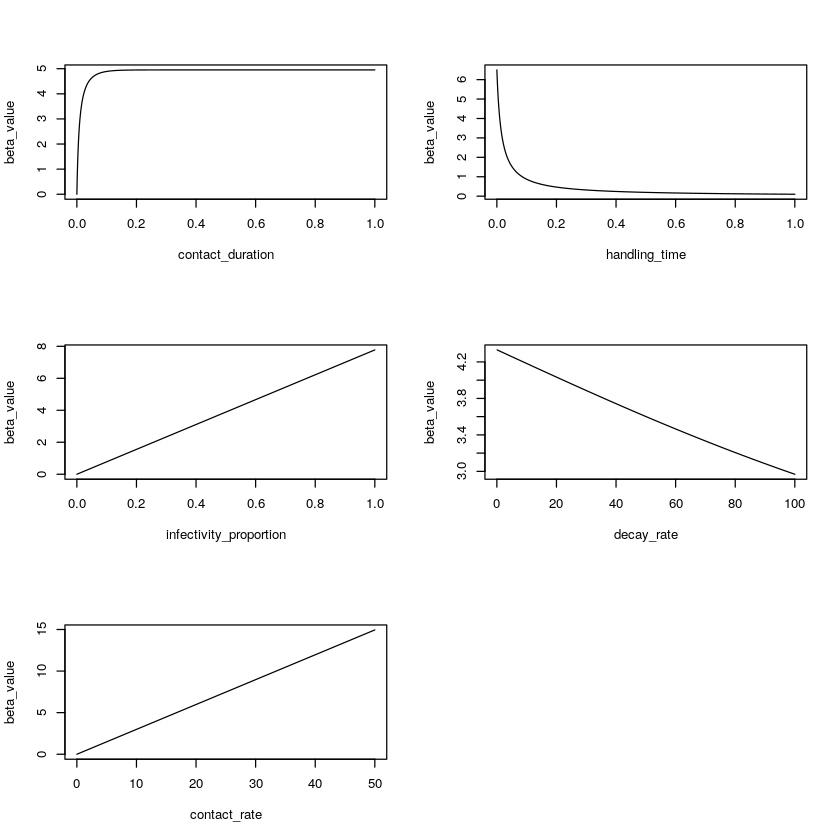

In [8]:
beta <-function(c_r,b,d,h,epsilon){
    return(c_r * epsilon *  (( (1 / b) * (1 - exp(- b * d)))/(( 1 / b) * (1 - exp(- b * d)) + h)))
}
             
#beta(c_r,b,d,h,epsilon)                                                 

parms = list(
contact_duration= 0.5 / 24,  #units -time(days)
handling_time=0.25 / 24, #days
infectivity_proportion=0.5, # maximum possibly transmissibility . not all contacts. eg in school
decay_rate= 30,  #decay (1/day)
contact_rate= 13
) #individuals/individual/day  
   
par(mfrow = c(3, 2))
for (i in 1:(length(parms))) {
  parmschange<- parms 
    if (i < 4) {
       x <- seq(0.000, 1, length.out = 1000)
        }
   if (i == 4){
        x <- seq(0.000, 100, length.out = 1000)
        }
   if (i == 5){
        x <- seq(0.000, 50, length.out = 1000)
        }

    parmschange[[i]] <- x
    beta_value = beta(c_r= parmschange[["contact_rate"]],b= parmschange[["decay_rate"]],d= parmschange[["contact_duration"]],h= parmschange[["handling_time"]],epsilon= parmschange[["infectivity_proportion"]])
    
    plot(x,beta_value, type = "l", xlab = names(parms[i]))
}


7.756152

### Functions

In [9]:
par(mfrow=c(2,1))

##########################################
cr_normal <- function(Climate, m , c, stype) {
    #parameters
    #m is the cooredinates where the contact rate is at a maximum 
    #c is 95 % confidence interval for duration
    #t range_C is the T values the function is calculated for
    #s type determines whether s is calculated using the upper or lower confidence interval
    c_u = c[2]
    c_l = c[1]
    m_C = m[1]
    m_cr = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_C) / 1.96
       }else{
          s = -(c_l - m_C) / 1.96
       }
  #find y axis of normal distribution given s   
     scaling = sqrt(2 * pi) * s * m_cr

    return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(Climate - m_C) ^ 2) / (2 * s ^ 2)))
}


#this is where quantile_95 is used 
cr <- function(Max_Coordinates_cr,quantile_95_cr, range_C, Climate) {
   #finds the equation fiven temp_at_max and range_C. then finds S for given T
   #uses where temp at max relates to range_C to determine stype (to determine whether lower or upper value of range_C is used to find SI)
   if (abs(Max_Coordinates_cr[1]-range_C[1])>abs(Max_Coordinates_cr[1]-range_C[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range_C not strictly needed 
   #return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = quantile_95, T_range_C = range_C, stype=stype))
   return(cr_normal(Climate = Climate,m = Max_Coordinates_cr, c = quantile_95_cr, stype=stype))
   
}





#function for mean duration of contact
mean_duration_normal <- function(Climate, m , c, stype) {
    #parameters
    #m is the cooredinates where the duration is at a maximum 
    #c is 95 % confidence interval for duration
    #t range_C is the T values the function is calculated for
    #s type determines whether s is calculated using the upper or lower confidence interval
    #T = seq(T_range_C[1], T_range_C[2], length.out = 10000)
    c_u = c[2]
    c_l = c[1]
    m_C = m[1]
    m_d = m[2]
    #find s
    if (stype==1){
       s = (c_u - m_C) / 1.96
       }else{
          s = -(c_l - m_C) / 1.96
       }
  #find y acis of normal distribution given s   
   #N_D =  (1 / (sqrt(2 * pi) * s)) *  exp((-(T - m_T) ^ 2) / (2 * s ^ 2))
   #d = N_D * sqrt(2 * pi) * s
     scaling = sqrt(2 * pi) * s * m_d
 
   #plot(T,d)
   #return(c(scaling, m_T, s))
    return(scaling*(1 / (sqrt(2 * pi) * s))*exp((-(Climate - m_C) ^ 2) / (2 * s ^ 2)))
}

d <- function(Max_Coordinates_d, quantile_95_d, range_C, Climate) {
   #finds the equation fiven temp_at_max and range_C. then finds duration for given Climate
   #uses where temp at max relates to range_C to determine stype (to determine whether lower or upper value of range_C is used to find SI)
   if (abs(Max_Coordinates_d[1]-range_C[1])>abs(Max_Coordinates_d[1]-range_C[2])){
      stype=0
      }else{
         stype=1
      }
   #finds d at T values for given parameters (contact finds equation using duration_normal_scaled)
   #t_range_C not strictly needed 
   #return(mean_duration(T = T,m = c(temp_at_max, max_mean_contact), c = quantile_95, T_range_C = range_C, stype=stype))
   return(mean_duration_normal(Climate = Climate,m = Max_Coordinates_d, c = quantile_95_d, stype=stype))

   
}
#estimating quadratic for mortality of virus
mortality_quadratic <- function(Climate, vertex , point) {
     
   #vertex is the maxima or minima, point is another point on the curve (usually min o)
   #scaled between 0 and 1 
   #finds a b and c
   #remember that applies only to C_range_C
   #find coefficients 
   # C_range_C is range_C of climate suitibilities
  
  
   a = ((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) 
  
   b = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * -2 * vertex[1]) 
   
   c = (((point[2] - vertex[2]) / (point[1] - vertex[1]) ^ 2) * vertex[1] ^2 + vertex[2]) 
  
   return(a* Climate ^ 2 + b * Climate + c)
}
# if type of standard deviation (stype) ==1 then use upper to find s ,else use lower. 
#This is to solve the issue that if maximum occurs at upper confidence interval, s will be 0. 






q <- function(Max_Coordinates_q,Min_Coordinates_q, range_C, Climate) {
   #this function uses the temp at max and range_C to decide which end of range_C to allocate as minimum.
   #then finds the equation for the given range_C and temp at max and finds S for given T 
   #uses specific min and max y values. should probably move that to input
    
   # the temp at min is the lower end of the range_C when the temp at max is closer to the upper end of the range_C and vice versa
   #this is because the quadratic is symmetric and bounded     
   
    
    if (Max_Coordinates_q[1] > (range_C_q[2] - range_C_q[1]) / 2) {
       Min_Coordinates_q[1] <- range_C_q[1]
      }else{
        Min_Coordinates_q[1] <- range_C_q[2]
      } 
    #outputs y value for temperature when vertexc, T_range_C and point are at values here
    return(mortality_quadratic(Climate = Climate, vertex = Max_Coordinates_q, point=Min_Coordinates_q))
}


### Varying Maxima

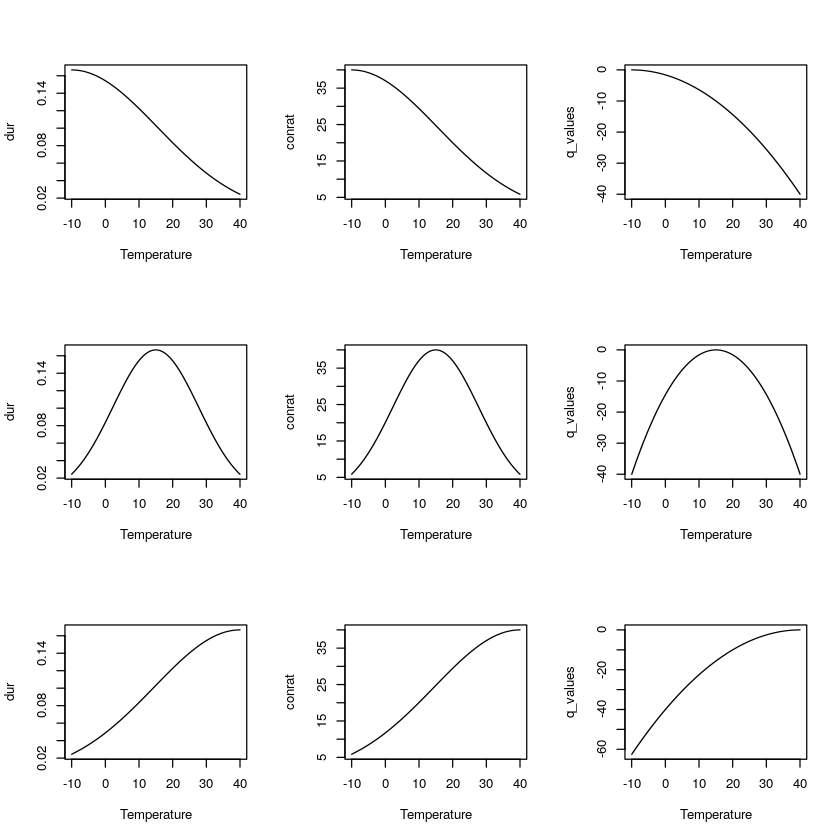

In [10]:
#plotting the curve for a given range_C with different peaks for d, s and cr

plot_different_max<-function(range_C){
   par(mfrow=c(3,3))
   maxvec<-c(range_C[1],range_C[1] +((range_C[2] - range_C[1]) / 2),range_C[2])
   Climate = seq(range_C[1], range_C[2] , length.out = 1000)
   for (i in maxvec) {
       #uses the value of maxvec to "decide" stype(decide whether lower or upper 95% quantile is used to calculate standard deviation)
       #find C and plot given specific parameters
      
      #choose climate it peaks at
      Max_Coordinates_d[1]<-i
      Max_Coordinates_cr[1]<-i
      Max_Coordinates_q[1]<-i

      dur= d(Climate =  Climate,Max_Coordinates_d = Max_Coordinates_d, range_C=range_C, quantile_95_d = quantile_95_d )
      plot(Climate, dur, type = "S",xlab=climate_label)
      conrat=cr(Climate =  Climate,Max_Coordinates_cr = Max_Coordinates_cr, range_C=range_C, quantile_95_cr = quantile_95_cr)
      plot(Climate, conrat, type = "S",xlab=climate_label)
      q_values= q(Climate=Climate, range_C=range_C, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)
      plot(Climate, q_values, type = "s",xlab=climate_label)
   } 

}
plot_different_max(range_C)


#b=-q. These graphs show peak varying according to what is best for virus

###  Beta and R0 when peak varies

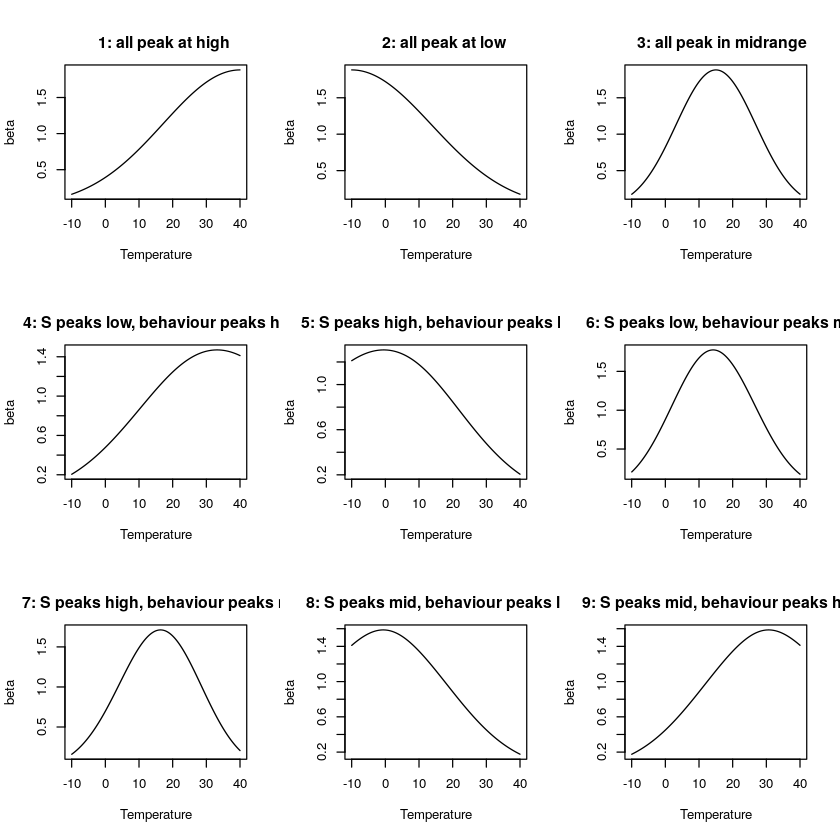

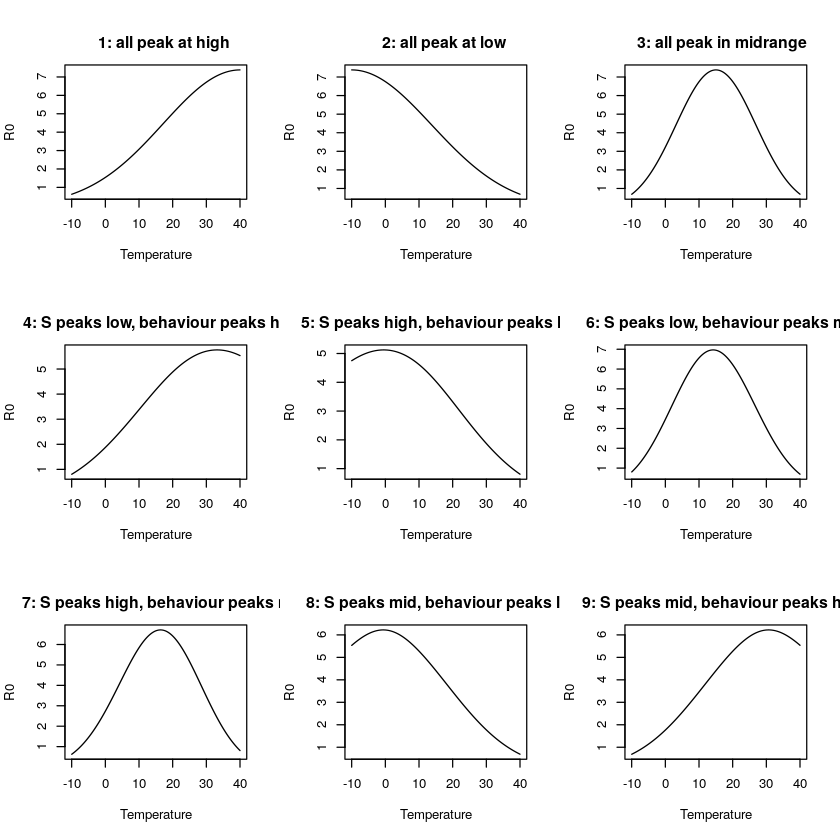

In [11]:
#plotting R0 and beta
plot_matrix<-function(h,epsilon,mu,sigma,alpha,gamma,range_C, plot_what, label){
   
    par(mfrow = c(3, 3))
    
    Climate<- seq(range_C[1], range_C[2] , length.out = 1000)

    #completely susceptible population
    #maxes is a matrix with different combinations of maximum for S, cr ,d 

    maxes<-matrix(c(range_C[2],range_C[2],range_C[2],range_C[1],range_C[1],range_C[1],
                range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),range_C[1] + ((range_C[2] - range_C[1]) / 2),
                range_C[1],range_C[2],range_C[2],
                range_C[2],range_C[1],range_C[1],
                range_C[1],range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),
                range_C[2],range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),
                range_C[1] +((range_C[2] - range_C[1]) / 2),range_C[1],range_C[1],
                range_C[1] +((range_C[2] - range_C[1]) / 2),range_C[2],range_C[2]),
                byrow=T, nrow=9,ncol=3)
    #titles corresponding to rows in matrix
    titles<-c("
    1: all peak at high","
    2: all peak at low","
    3: all peak in midrange_C ","
    4: S peaks low, behaviour peaks high","
    5: S peaks high, behaviour peaks low ","
    6: S peaks low, behaviour peaks mid","
    7: S peaks high, behaviour peaks mid","
    8: S peaks mid, behaviour peaks low","
    9: S peaks mid, behaviour peaks high")

    for (a in 1:nrow(maxes)){
          Max_Coordinates_d[1]<-maxes[a,3]
          Max_Coordinates_cr[1]<-maxes[a,2]
          Max_Coordinates_q[1]<-maxes[a,1]
     
          d_value= d(Climate =  Climate,Max_Coordinates_d = Max_Coordinates_d, range_C=range_C, quantile_95_d = quantile_95_d )

          cr_value=cr(Climate =  Climate,Max_Coordinates_cr = Max_Coordinates_cr, range_C=range_C, quantile_95_cr = quantile_95_cr)

          b_value= -1 * q(Climate=Climate, range_C=range_C, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)


          beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )
          R_0 <-(sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma)
          if (label=="beta"){
              plot(Climate, beta_value, type = "s" ,main=titles[a], ylab=label, xlab=climate_label)
          }else{
              plot(Climate, R_0, type = "s" ,main=titles[a], ylab=label,xlab=climate_label)

          }
    }
       
}
plot_matrix(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25,range_C = range_C,label="beta")

plot_matrix(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25,range_C = range_C,label="R0")


#1 all peak at high Climate
#2 all peak at low Climate
#3 all peak in midrange_C Climate
#4 S peaks low, behaviour peaks high
#5 S peaks high, behaviour peaks low 
#6 S peaks low, behaviour peaks mid
#7 S peaks high, behaviour peaks mid
#8 S peaks mid, behaviour peaks low
#9 S peaks mid, behaviour peaks high

### Series

In [12]:
require("epimdr")

Loading required package: epimdr
Loading required package: shiny
Loading required package: deSolve
Loading required package: polspline


In [13]:
Climate_Function<- function(time,min,max,time_at_peak) {
  # here, climate is varying with time at a yearly cycle.
  return((max-min)/2 * cos((2 * pi / 365)* (time - time_at_peak ) ) + (max+min)/2)
}

#t<-seq(0,365,length.out = 100)

#plot(t,Climate_Function(t=t, min=5, max=19, time_at_peak=time_at_peak))

In [45]:
range_C<-c(-3,21)

In [55]:


SEIR_model <- function(time, values, parms) {
   #function where c changes with the climate and humidity at each timepoint
   #initial values
   S <- values[1]
   E <- values[2]
   I <- values[3]
   R <- values[4]
   N <- values[5]
   #parameters

   for (parameter in names(parms)){
       assign(parameter,parms[[parameter]])
   }
   
   #find climate given time
   Climate <- Climate_Function(time=time,min=range_C[1],max=range_C[2],time_at_peak = time_at_peak) 
    
   Max_Coordinates_d[1]<-maxes[choose,3]
   Max_Coordinates_cr[1]<-maxes[choose,2]
   Max_Coordinates_q[1]<-maxes[choose,1]
    
   #d_value= d(Climate =  Climate,Max_Coordinates_d = Max_Coordinates_d, range_C=range_C, quantile_95_d = quantile_95_d )
   cr_value=cr(Climate =  Climate,Max_Coordinates_cr = Max_Coordinates_cr, range_C=range_C, quantile_95_cr = quantile_95_cr)
   b_value= -1 * q(Climate = Climate,range_C=range_C, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)
   d_value=2/24
   beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )    
   
    #seir model
   dS = nu * N - beta_value * I * S / N - mu * S 
   dE = beta_value * S * I / N - (sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R 
   dN = nu * N - alpha * I - mu * (S + E + I + R)
    
    
  
    
    list(c(dS, dE, dI, dR, dN))
}



plottime <- function(start, time, model, parms) {
   #plotting seir components over time
   out = ode(    y = start,    time = time,    func = model,    parms = parms  )
   choose <- parms[["choose"]]
   plot(x = out[, "time"], y= out[, "S"], ylab = "Number", xlab = "Time",
        type = "l", xlim=c(min(time), max(time)),ylim=c(0, parms[["N"]]))
   lines(x = out[, "time"],y= out[, "E"], col = "orange_C")
   lines(x = out[, "time"],y= out[, "I"], col = "red")
   lines(x = out[, "time"],y= out[, "R"], col = "green")
   lines(x = out[, "time"],y= out[, "N"], col = "purple")  
   abline(h = max(out[,"I"]),lty=3,col="red")
   legend( "topright",legend = c("S", "E", "I", "R","N","Max I"), 
          col = c("black", "orange_C", "red", "green","purple","red"), lty = c(1,1,1,1,1,3), cex = 0.8)
   
   maxpercent=max(( out[, "I"]/ out[, "N"])*100)
   maximum= paste("Maximum I is:",round(maxpercent,digits = 2),"%")
   text(max(time)/2, max(out[, "N"]),maximum)
   title(main=paste("q peaks at",maxes[choose,1],", cr peaks at",maxes[choose,2]))
                    #", d peaks at",maxes[choose,3]))
    #plotting infection numbers over time
   # plot(x = out[, "time"],   y= out[, "I"] ,    ylab = "Number",   xlab = "Time",    
    #   type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, max(out[,"I"]))) 
}


plot_maxes_series<-function(parms,start,time,maxes,titles, model){
   par(mfrow=c(2,2))
    for (choose in 1:nrow(maxes)){
    parms[["choose"]] <- choose
    #png(paste("../../Results/Series/Series_",p,".png"))
    plottime(time = time, parms = parms, start = start,  model = model)
    #dev.off()
    }
}



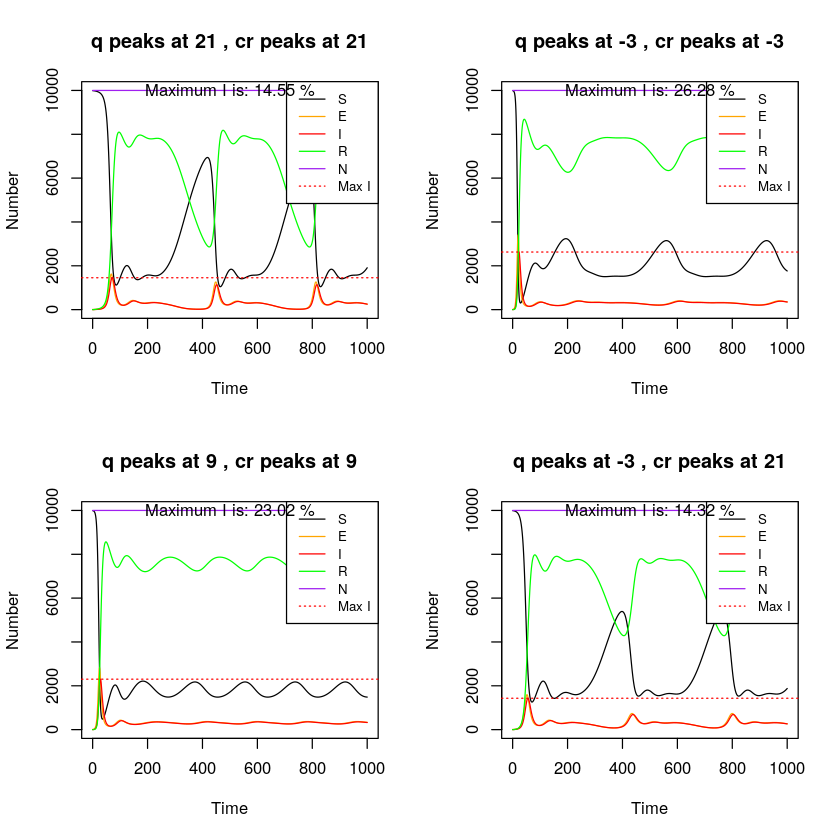

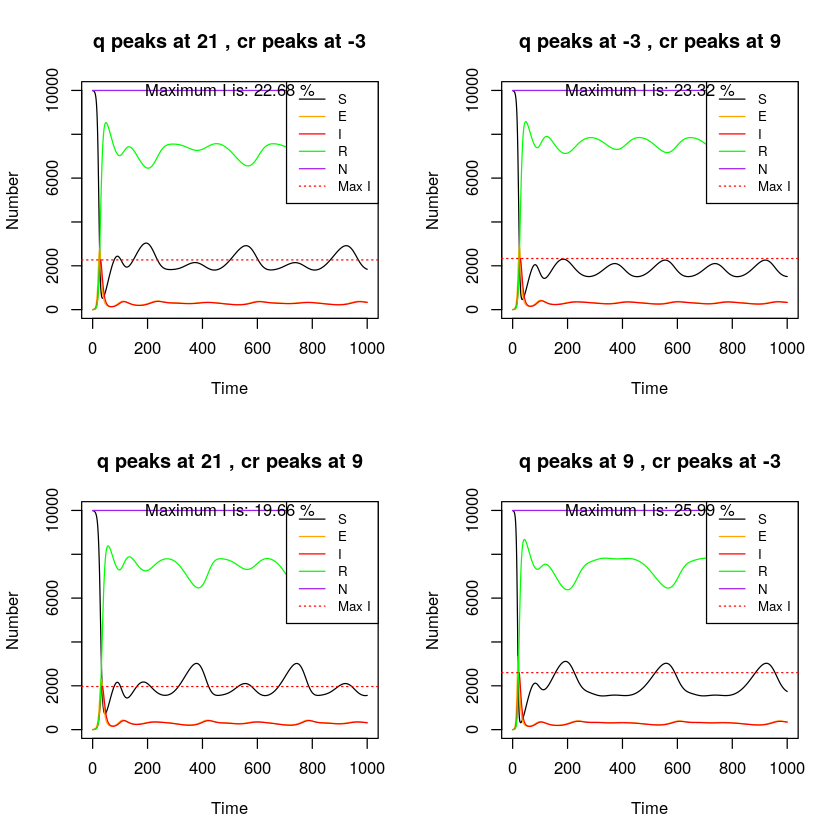

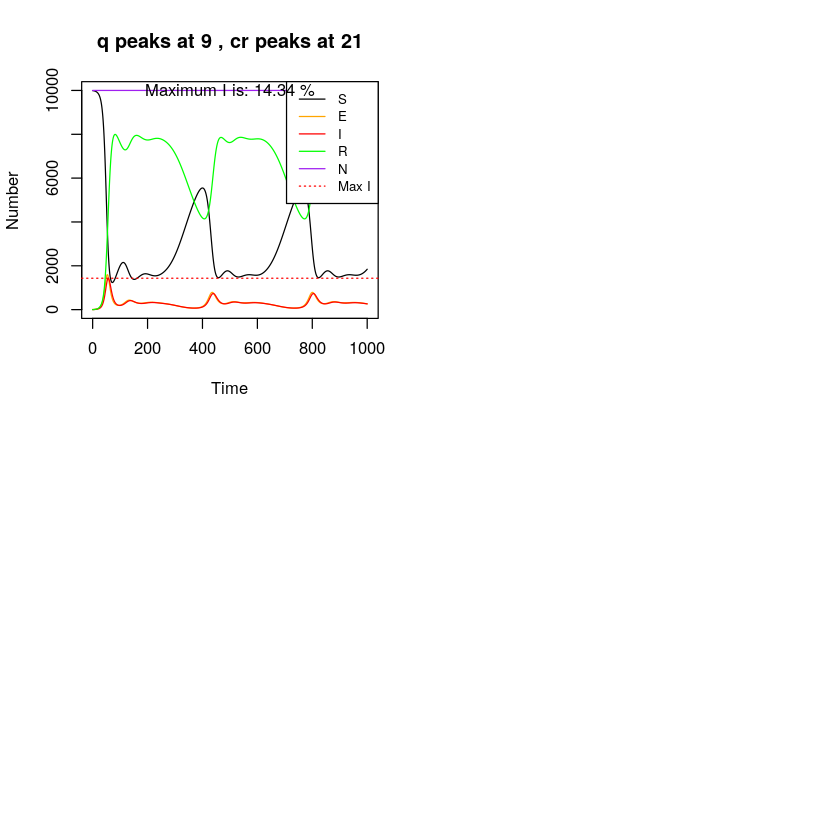

In [56]:
maxes<-matrix(c(range_C[2],range_C[2],range_C[2],range_C[1],range_C[1],range_C[1],
                range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),range_C[1] + ((range_C[2] - range_C[1]) / 2),
                range_C[1],range_C[2],range_C[2],
                range_C[2],range_C[1],range_C[1],
                range_C[1],range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),
                range_C[2],range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),
              range_C[1] +((range_C[2] - range_C[1]) / 2),range_C[1],range_C[1],
              range_C[1] +((range_C[2] - range_C[1]) / 2),range_C[2],range_C[2]),
              byrow=T, nrow=9,ncol=3)
   titles<-c("
    1: all peak at high","
    2: all peak at low","
    3: all peak in midrange_C ","
    4: S peaks low, behaviour peaks high","
    5: S peaks high, behaviour peaks low ","
    6: S peaks low, behaviour peaks mid","
    7: S peaks high, behaviour peaks mid","
    8: S peaks mid, behaviour peaks low","
    9: S peaks mid, behaviour peaks high")

parms = list( mu = 00.01,sigma = 0.25 ,alpha = 0.00, gamma =0.25,
               N = 10000, nu = 0.01, range_C = range_C, h=0.25 / 24 ,epsilon= 0.05, choose=NA)

start = c(S = 0.999*parms[["N"]],
          E = 0.001*parms[["N"]],
          I = 0.00*parms[["N"]],
          R = 0*parms[["N"]],
          N = parms[["N"]])
time = seq(0,1000, by = 0.1)


plot_maxes_series(parms=parms,start=start,time=time,maxes=maxes,titles=titles, model=SEIR_model)



#could alter duration of immunity
# duration constant here

# for large climate range_C if mu and nu are 0.07- or 0.1 theres actually 2 (sometimes 3) peaks a year. when cr=15, very defined. otherwise  very low 
#parameters really change dynamics
#addition of loss ofg immunity similar effect 

### R0 mismatch plot

In [14]:
#plotting R0 and beta
require(ggplot2)

#functions
find_R0_function<-function(Climate,range_C,parms, Maxes, max_R0_Req){
    #finds r0 given temperatures where peak occurs. can use this to find maximum if max_r0_req is true
    #take variables from list to individual variables
    for (parameter in names(parms)){
        assign(parameter,parms[[parameter]])
    }
    for (Max in names(Maxes)){
        assign(Max,Maxes[[Max]])
    }
    # max_R0_req- find all or just max?
    #d and cr as functions of time
    d_value= d(Climate =  Climate,Max_Coordinates_d = Max_Coordinates_d, range_C=range_C, quantile_95_d = quantile_95_d )
    cr_value=cr(Climate =  Climate,Max_Coordinates_cr = Max_Coordinates_cr, range_C=range_C, quantile_95_cr = quantile_95_cr)
    b_value= -1 * q(Climate=Climate, range_C=range_C, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)
    
    #beta as a function of time
    beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )
    
    #below finds the R0 at maximum if required
    #Climate[which.max((sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma))]
    if (max_R0_Req =="True"){
        return(max((sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma)))  
    }else{
    return(c((sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma)))  
    }
}


find_beta_function<-function(Climate,range_C,parms, Maxes, max_beta_Req){
    #finds maximum beta given temperatures where peak occurs
    for (parameter in names(parms)){
        assign(parameter,parms[[parameter]])
    }
    for (Max in names(Maxes)){
        assign(Max,Maxes[[Max]])
    }
    # max_R0_req- find all or just max?
    #d and cr as functions of time
    d_value= d(Climate =  Climate,Max_Coordinates_d = Max_Coordinates_d, range_C=range_C, quantile_95_d = quantile_95_d )
    #d_value=0.25/24. makes sure time is never bimodal
    cr_value=cr(Climate =  Climate,Max_Coordinates_cr = Max_Coordinates_cr, range_C=range_C, quantile_95_cr = quantile_95_cr)
    #cr_value=40 # this removes a strand 
    b_value= -1 * q(Climate=Climate, range_C=range_C, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)
    #beta as a function of time
    beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )
    
    #below finds the Temp at maximum if required
    #Climate[which.max((sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma))]
    if (max_beta_Req =="True"){
        return(max(beta_value)) 
    }else{
        return(beta_value)  
    }
}





plot_R0_mismatch_ggplot<-function(parms,range_C ,title){
   
    Climate<- seq(range_C[1], range_C[2] , length.out = 200)   
    dataframe<-matrix(nrow=length(Climate)^2,ncol=8)
   #loops through every climate maxima combination, finds functions which have these maxima, and uses this to find R0 as a function of time. 
   # the max of this is stored
    
   for (behaviour_index in (1:length(Climate))){
       
       #set temp at maximum to the ith point in combined climate
       Max_Coordinates_d[1]<-Climate[behaviour_index]
       Max_Coordinates_cr[1]<-Climate[behaviour_index]

       for (virus_index in (1:length(Climate))){
            
           #set temp at maximum to the virus index th point in combined climate
            Max_Coordinates_q[1]<-Climate[virus_index]
           
           
            index_value<-(behaviour_index-1)*length(Climate)+virus_index
            
            dataframe[index_value,1]<-abs((Climate[behaviour_index]-Climate[virus_index])/(range_C[2]-range_C[1]))  
            dataframe[index_value,2]<-find_R0_function(Climate=Climate,range_C=range_C,parms=parms, 
                  Maxes=list(Max_Coordinates_cr = Max_Coordinates_cr, Max_Coordinates_d = Max_Coordinates_d,
                             Max_Coordinates_q = Max_Coordinates_q),max_R0_Req="True")
            dataframe[index_value,3]<-Max_Coordinates_q[1]
            dataframe[index_value,4]<-Max_Coordinates_d[1]
            dataframe[index_value,5]<-Max_Coordinates_cr[1]
            dataframe[index_value,6]<-max(beta_value)
            dataframe[index_value,7]<- behaviour_index
            dataframe[index_value,8]<-virus_index
        }
    
    }
    dataframe<-as.data.frame(dataframe)
    colnames(dataframe)<-c("Mismatch","Max_R0","MaxT_q","MaxT_d","MaxT_cr","Max_Beta","behaviour_climate","virus_climate")      
    
    return(ggplot(data=dataframe,aes(Mismatch,Max_R0,col=MaxT_q))+geom_point(size=0.1)+theme_bw() +ggtitle(title) +ylim(0,max(dataframe[,2]))) 
    #all look a lot like this      
}



plot_R0_mismatch_basic<-function(parms ,range_C, title){
    
    Climate<- seq(range_C[1], range_C[2] , length.out = 100)
    
    R0<-matrix(nrow=length(Climate),ncol=length(Climate))
   
    Mismatch<-matrix(nrow=length(Climate),ncol=length(Climate))
   
    #loops through every climate maxima combination, finds functions which have these maxima, and uses this to find R0 as a function of time. 
    
   for (behaviour_index in (1:length(Climate))){
       #set temp at maximum to the ith point in combined climate
       Max_Coordinates_d[1]<-Climate[behaviour_index]
       Max_Coordinates_cr[1]<-Climate[behaviour_index]
       
       
       for (virus_index in (1:length(Climate))){
            #set temp at maximum to the virus index th point in combined climate
            Max_Coordinates_q[1]<-Climate[virus_index]
            
            R0[ behaviour_index,virus_index]<-find_R0_function(Climate=Climate,range_C=range_C,parms=parms, 
                  Maxes=list(Max_Coordinates_cr = Max_Coordinates_cr, Max_Coordinates_d = Max_Coordinates_d,
                             Max_Coordinates_q = Max_Coordinates_q),max_R0_Req="True")
            Mismatch[ behaviour_index,virus_index]<-abs((Climate[behaviour_index]-Climate[virus_index])/(range_C[2]-range_C[1]))            
        }
    
    }
   
    return(plot(Mismatch, R0,pch=16,cex=0.2,xlab="Mismatch",ylab="Maximum R0", main = title, ylim=c(0,max(R0))))      
}
    




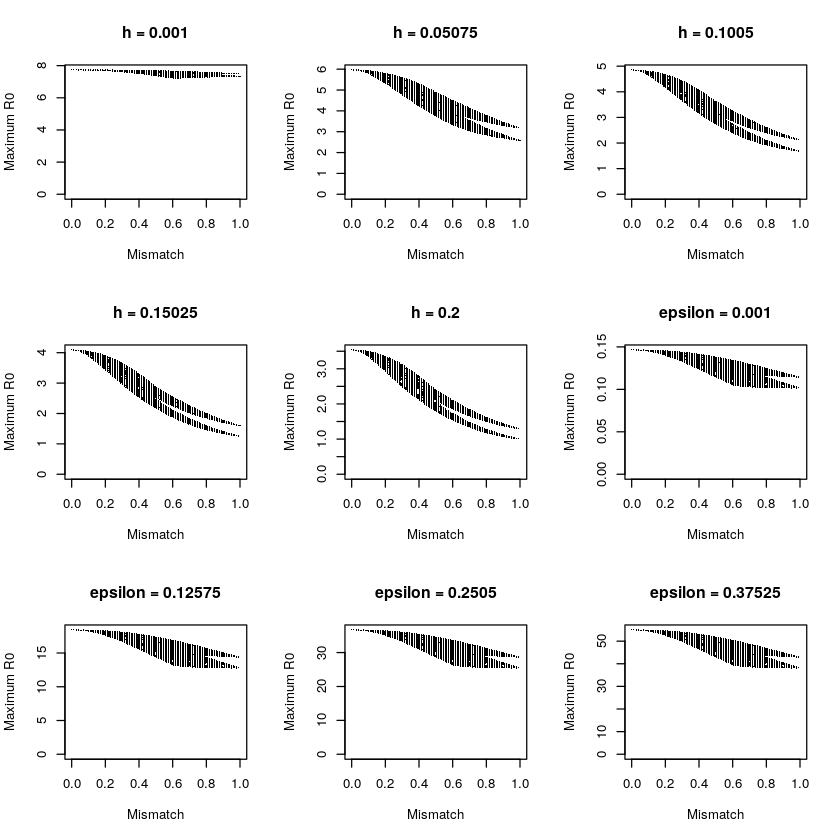

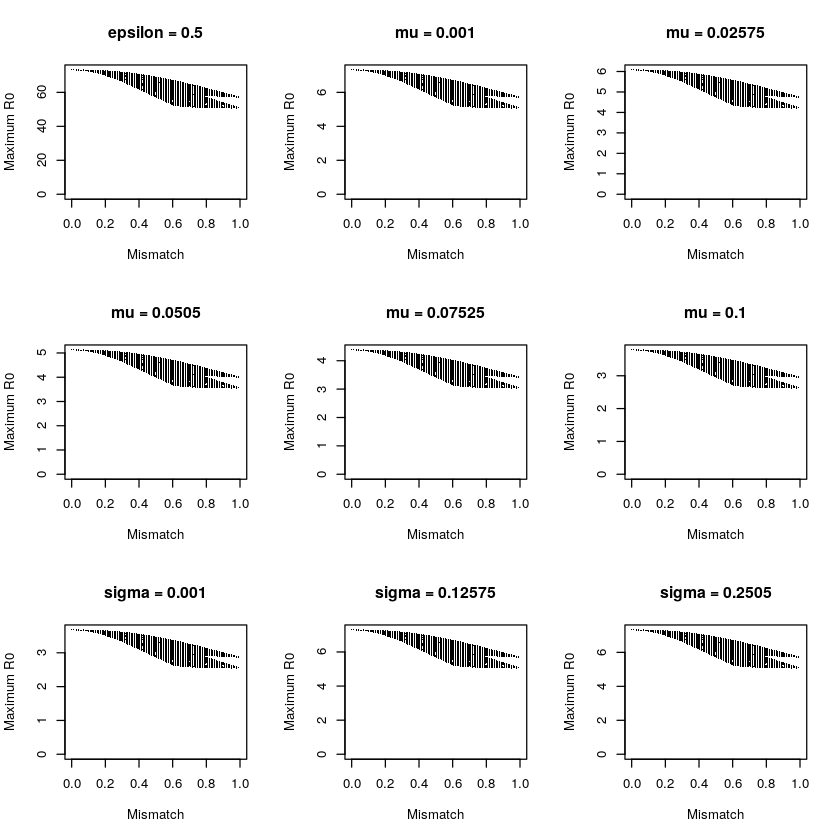

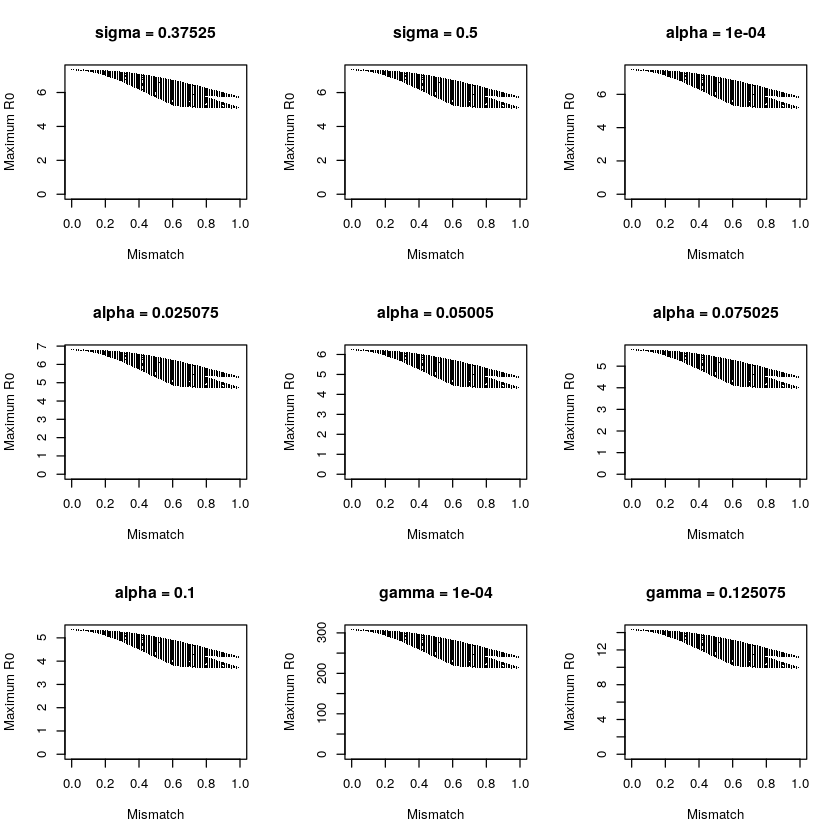

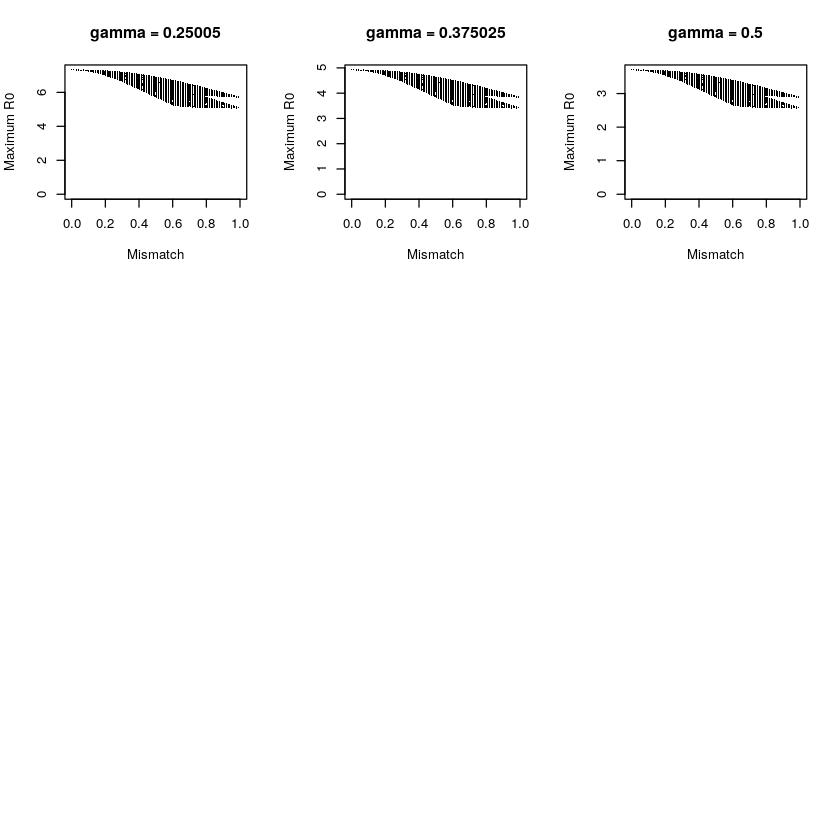

In [15]:
R0_mismatch_sensitivity<-function(range_C,initial_parameters,low_parameters,high_parameters){
  #changing variable values to see how sensitive result is to starting values. 
    par(mfrow=c(3,3))
    for (each in names(initial_parameters)){
        parmschange<-parms
        parmschange[[each]]<-seq(low[[each]],high[[each]],length.out = 5)
        
        for (i in parmschange[[each]]){
            parmschange[[each]]<-i     
            plot_R0_mismatch_basic(parms=parmschange,range_C = range_C, title=paste(each,"=",i))
        }
    }  
    
}

parms=list(h=0.25 / 24,epsilon=0.05,mu = 0.001,sigma = 0.25,alpha = 0.005,gamma = 0.25)
low=list(h=0.001,epsilon=0.001,mu = 0.001,sigma = 0.001,alpha = 0.0001,gamma = 0.0001)
high=list(h=0.2,epsilon=0.5,mu = 0.1,sigma = 0.5,alpha = 0.1,gamma = 0.5)

R0_mismatch_sensitivity(range_C,parms, low, high)

#h has the biggest impact on shape, others have a big impact on scaling- if h (i.e contact time needed to cause disease) is very small, mismatch has a very small effect. This seems surprising? as cr is still varying

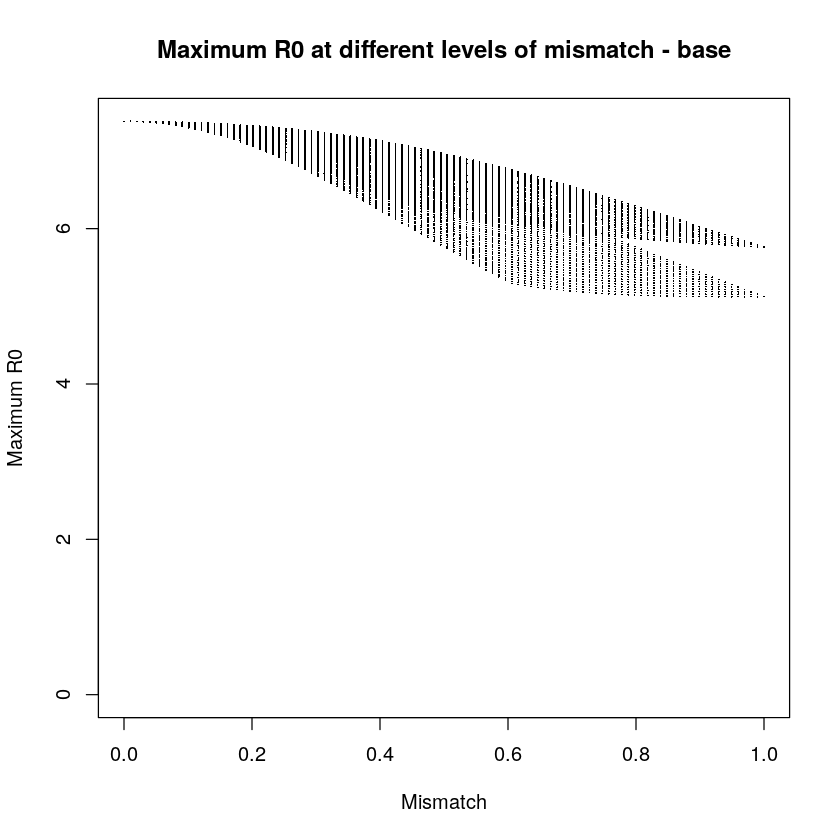

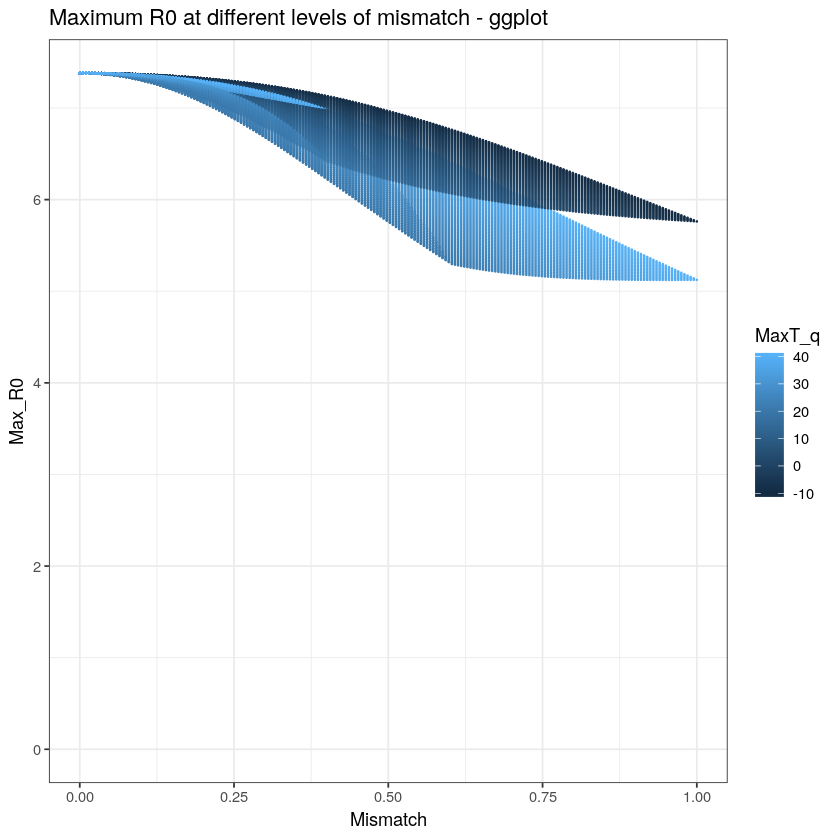

In [17]:

plot_R0_mismatch_basic(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C, title="Maximum R0 at different levels of mismatch - base")
plot_R0_mismatch_ggplot(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C, title="Maximum R0 at different levels of mismatch - ggplot")


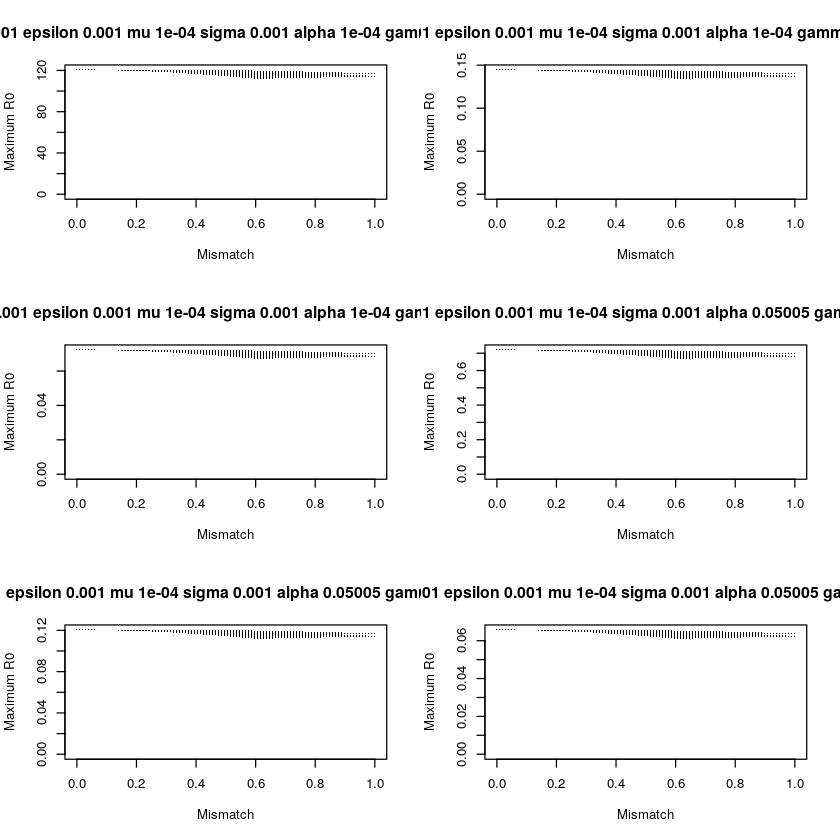

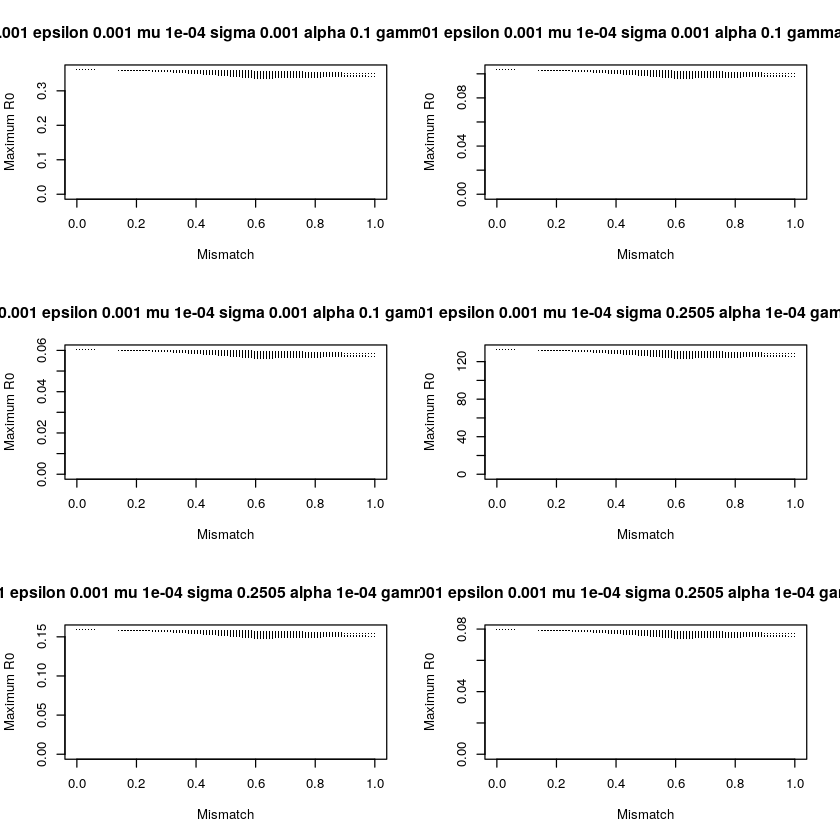

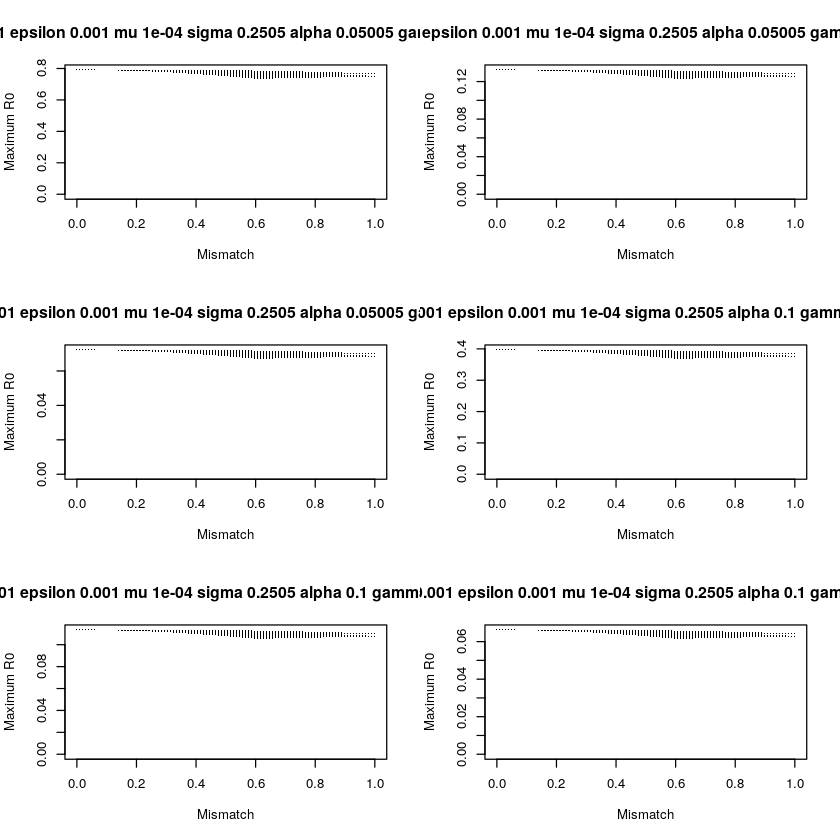

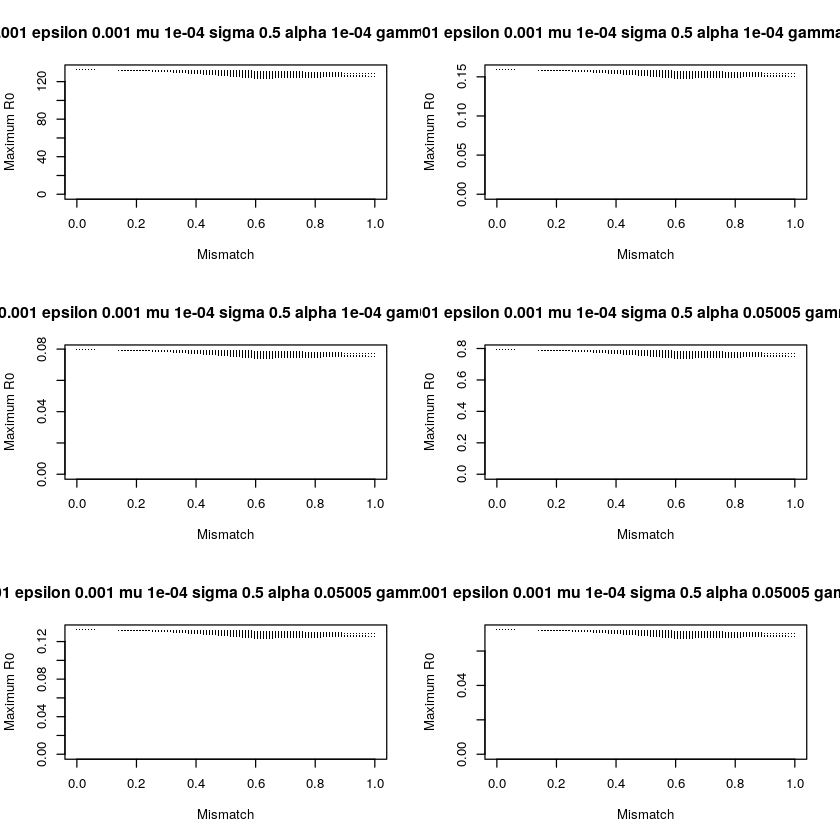

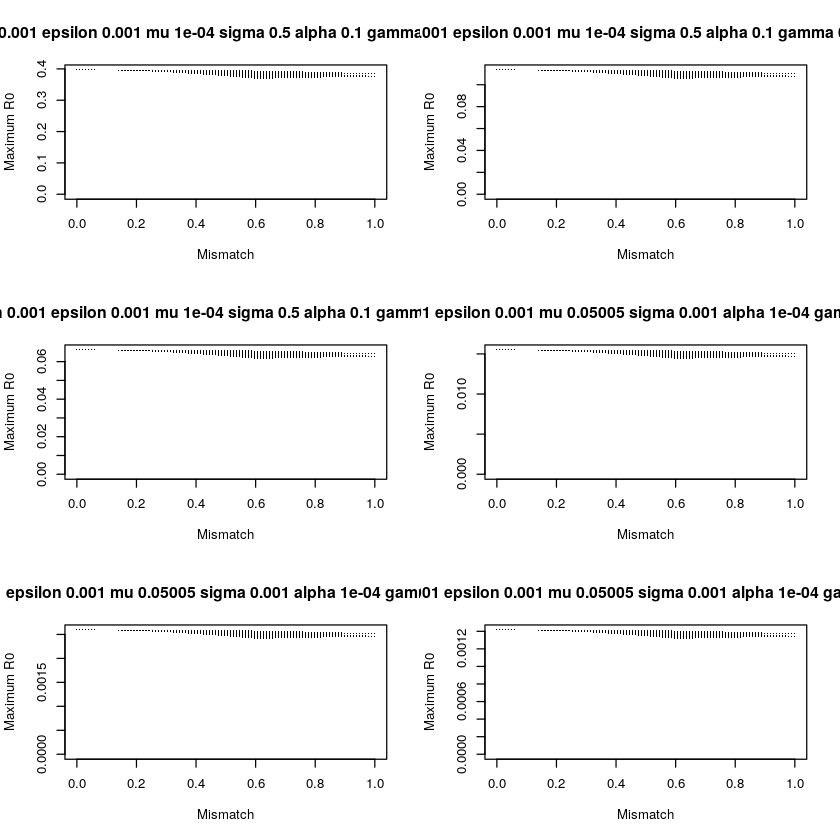

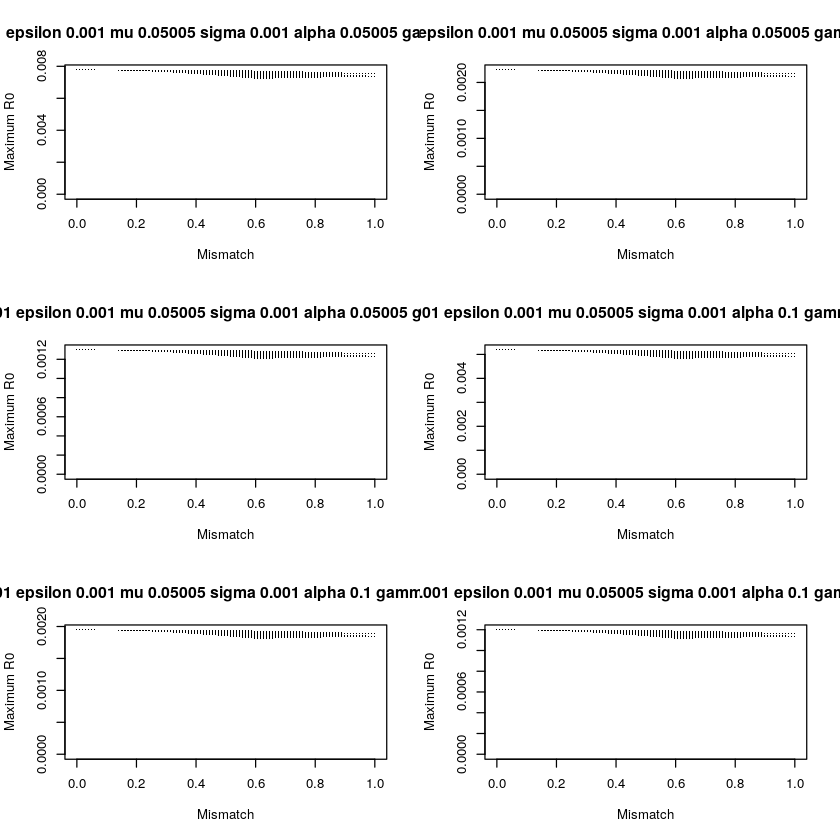

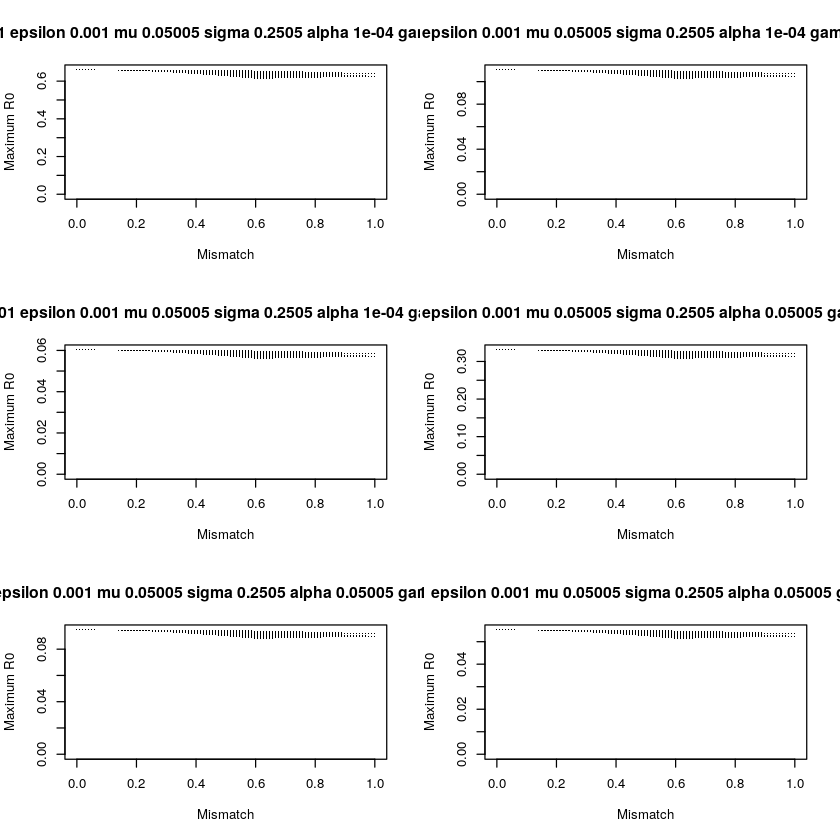

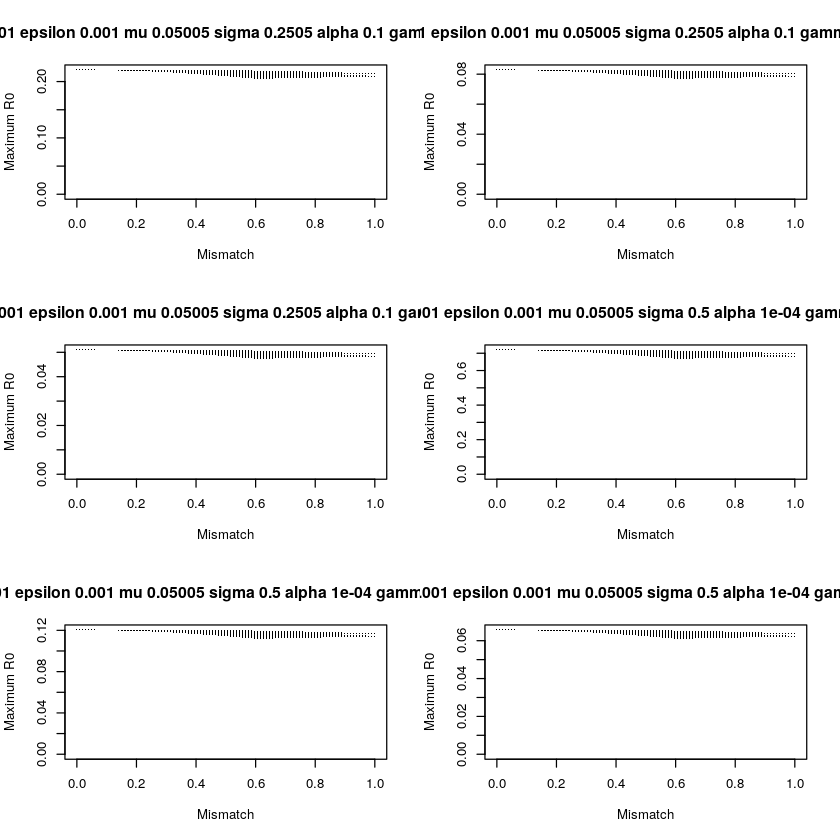

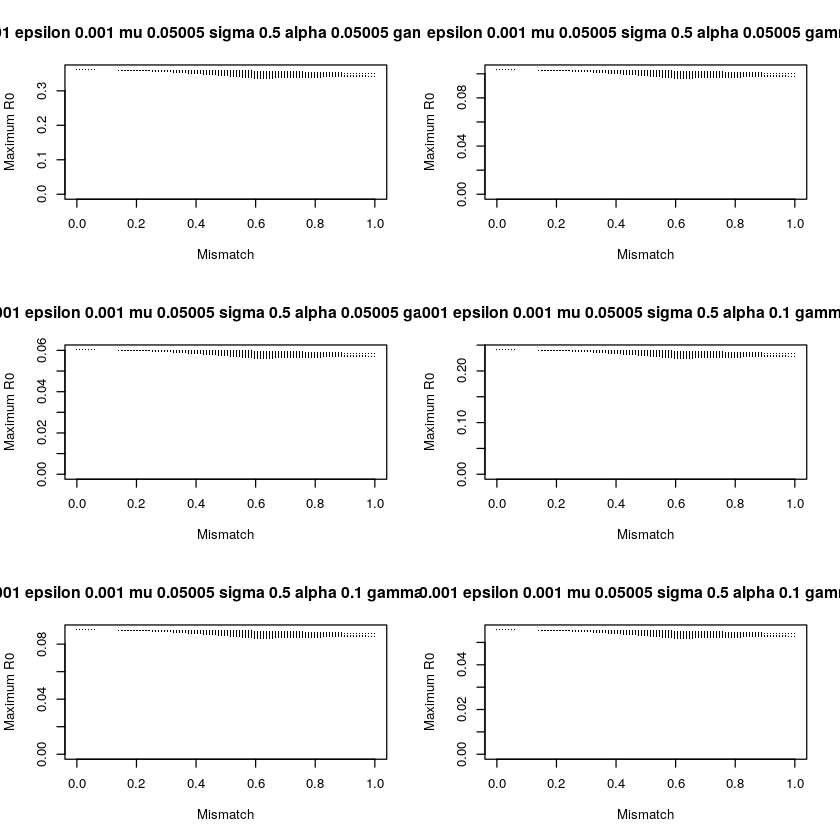

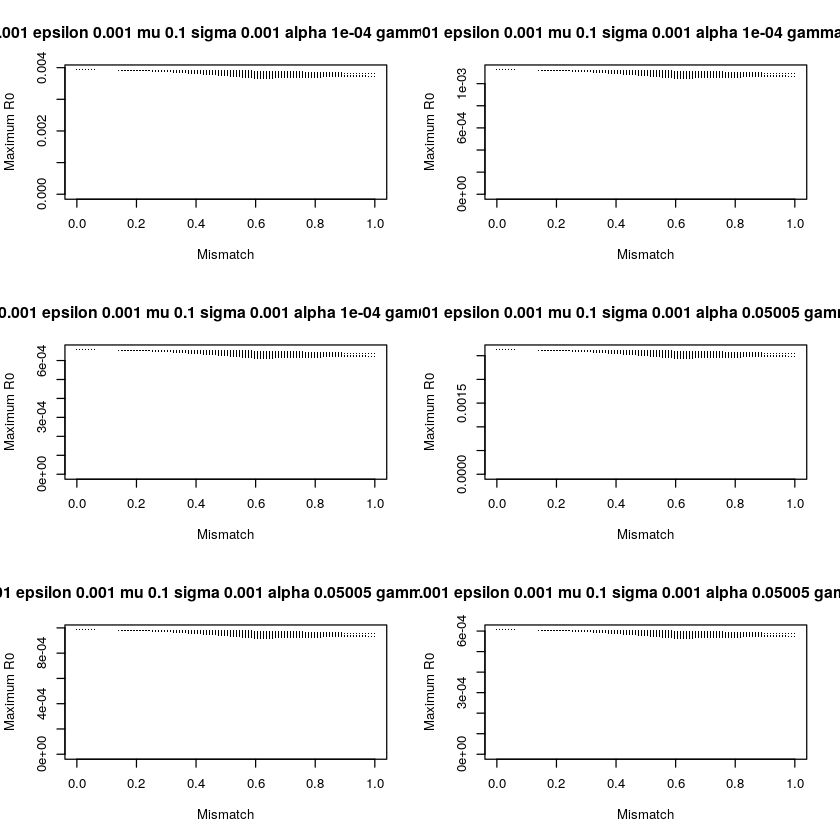

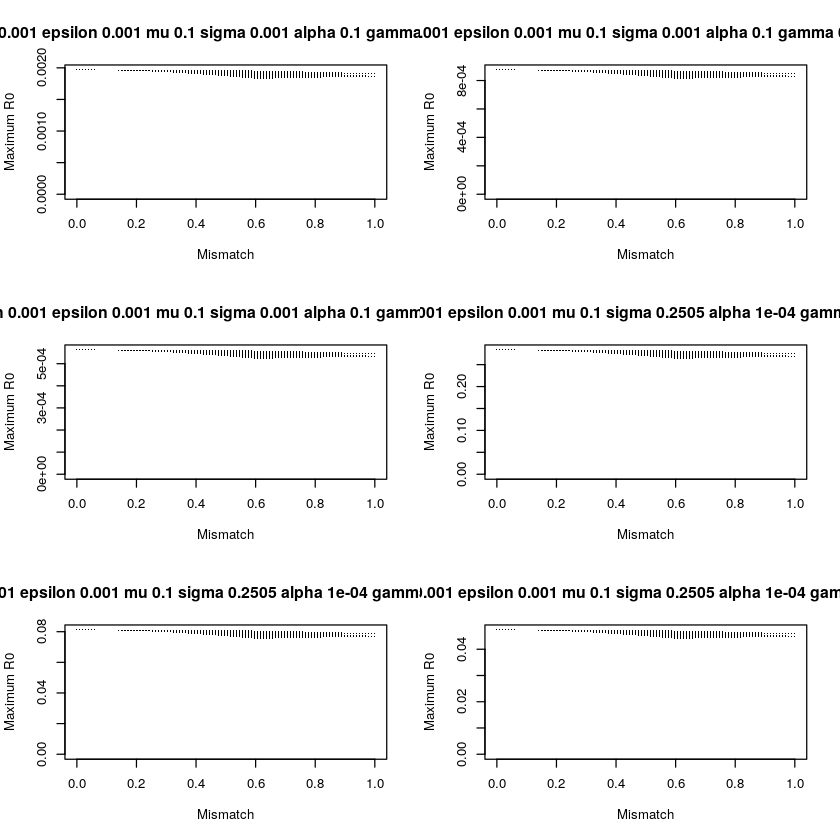

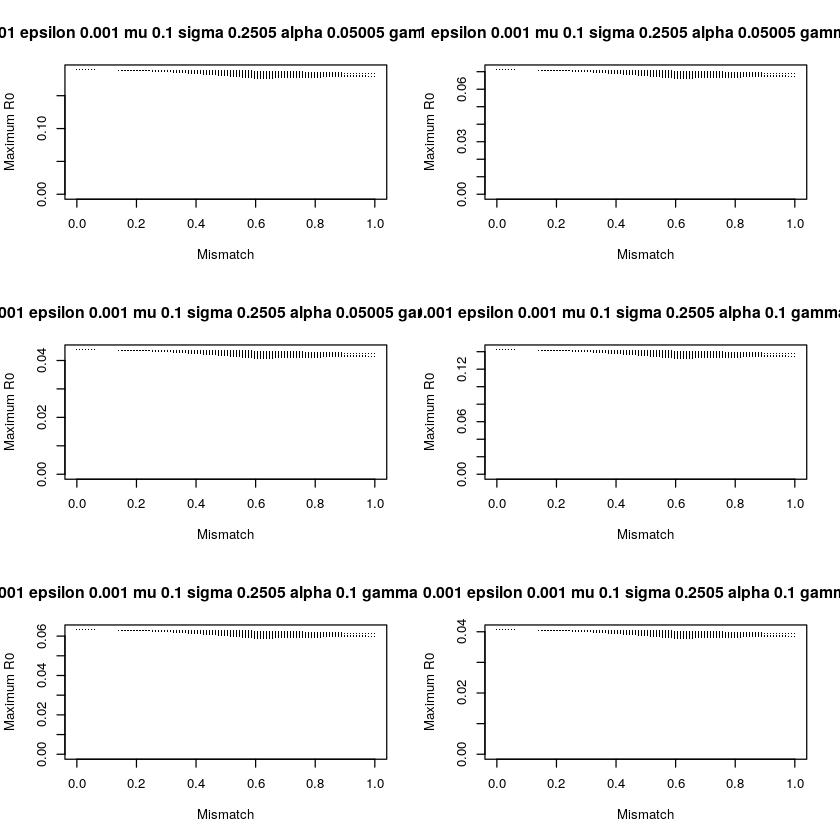

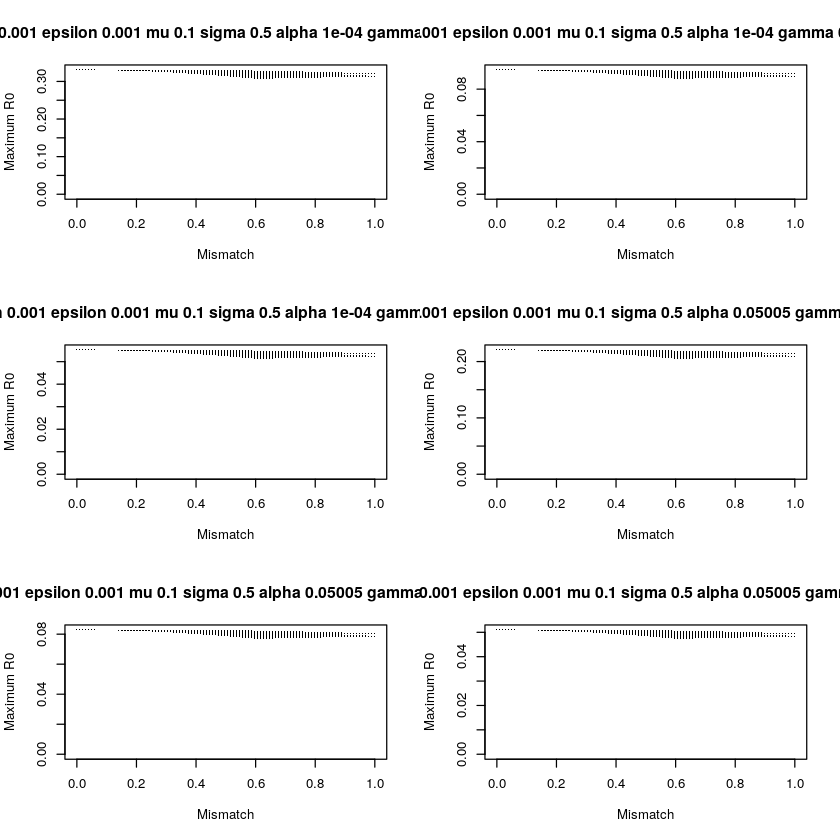

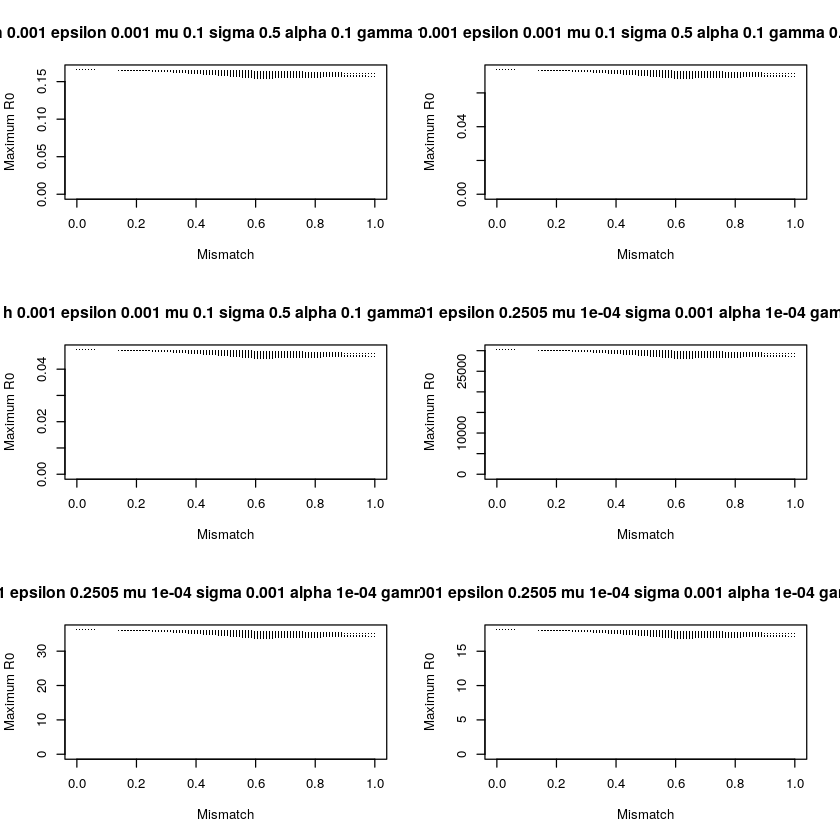

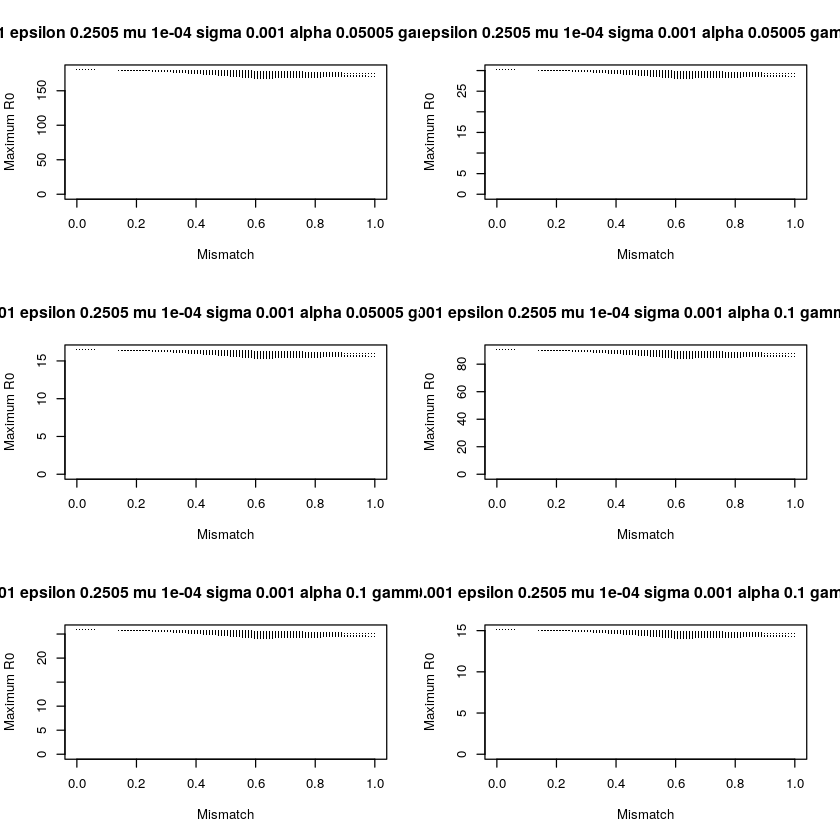

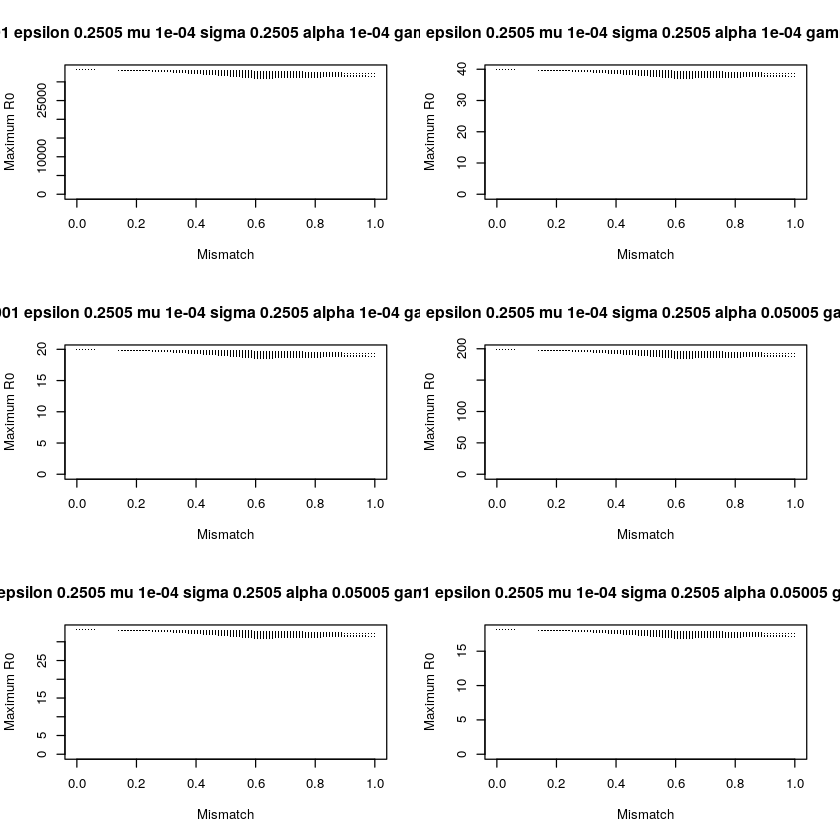

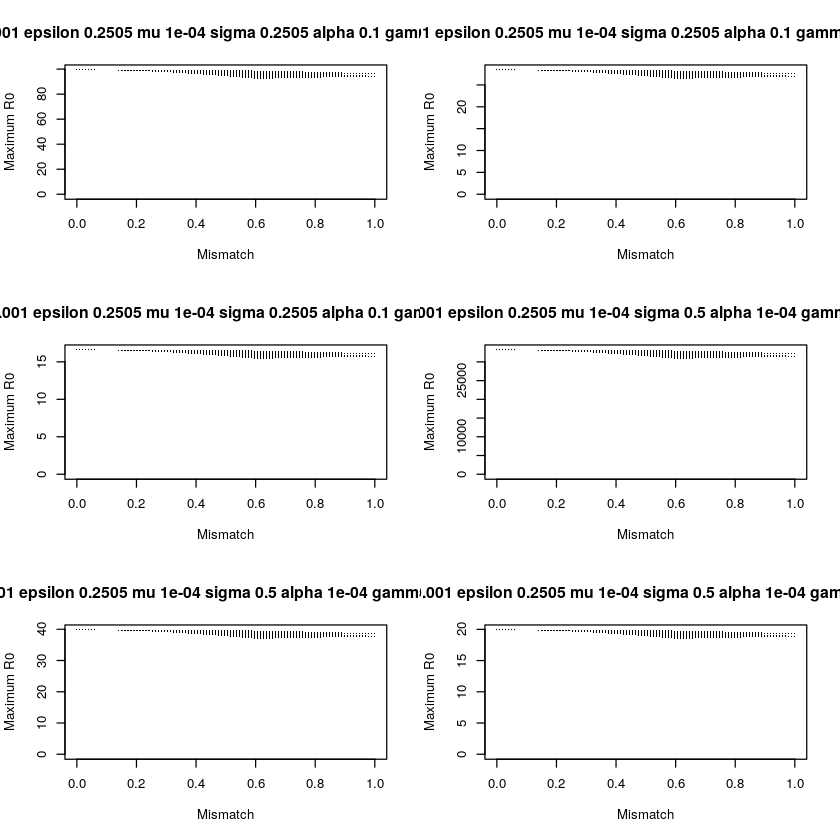

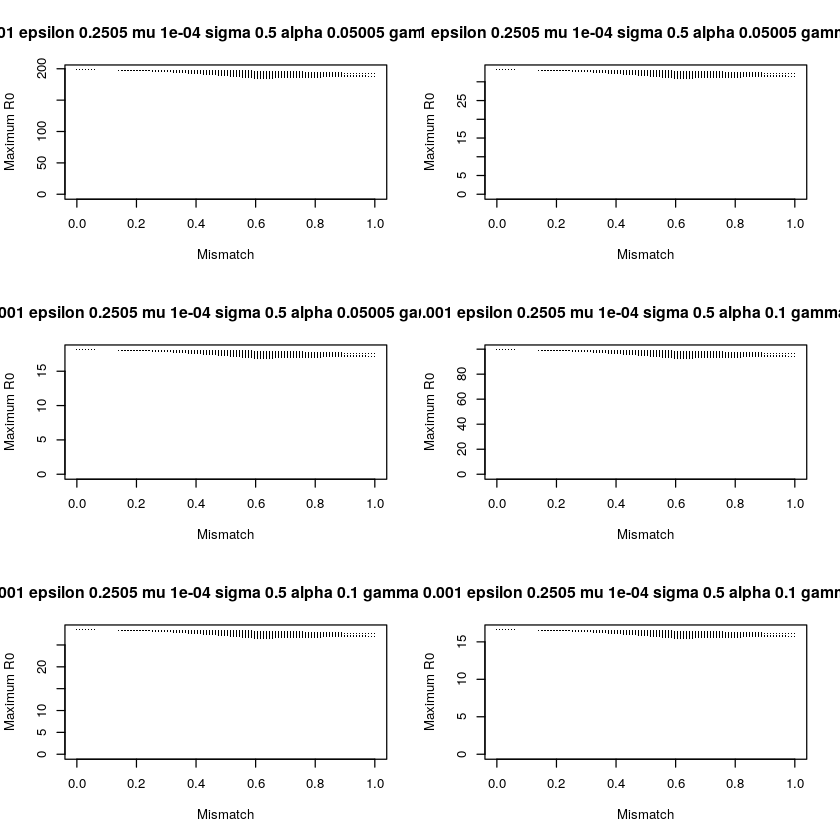

In [18]:
R0_mismatch_sensitivity<-function(range_C){
  #similar to above, but changing different parameters simultaneously to get an ideao of interactions
    par(mfrow=c(3,1))
    h_vec<-seq(0.001,0.2,length.out = 3)
    epsilon_vec<-seq(0.001,0.5,length.out = 3)
    omega_vec<-seq(0.001,0.5,length.out = 3)
    mu_vec<-seq(0.0001,0.1,length.out = 3) 
    alpha_vec<-seq(0.0001,0.1,length.out = 3)  
    gamma_vec<-seq(0.0001,0.5,length.out = 3) 
    
    for (i in h_vec){
      for (j in epsilon_vec){  
       for (k in mu_vec){ 
          for (l in omega_vec){ 
            for (m in alpha_vec){
              for (n in gamma_vec){
                    plot_R0_mismatch_basic(parms=list(h=i,epsilon=j,mu = k,sigma = l,alpha = m,gamma = n),
                                           range_C = range_C, title=paste("h",i,"epsilon",j,"mu",k,"sigma",l,"alpha",m,"gamma",n))
                    }
                }
              }
           }
        }
    }
    
}

R0_mismatch_sensitivity(range_C)

#by eye fairly similar
#except h being small (0.001) really changes the shape. probably because it has a very non linear effect on beta(see beta graphs earlier)

#but general trend is that more mismatch lowers maximum R0. birfurcation around 50% mismatch, some steeper and less steap  (much more common) decrease
#lower temperature peak associated with being in this steeper category. go into more
#investigate more in general.remove absolute value - can see more detail. 

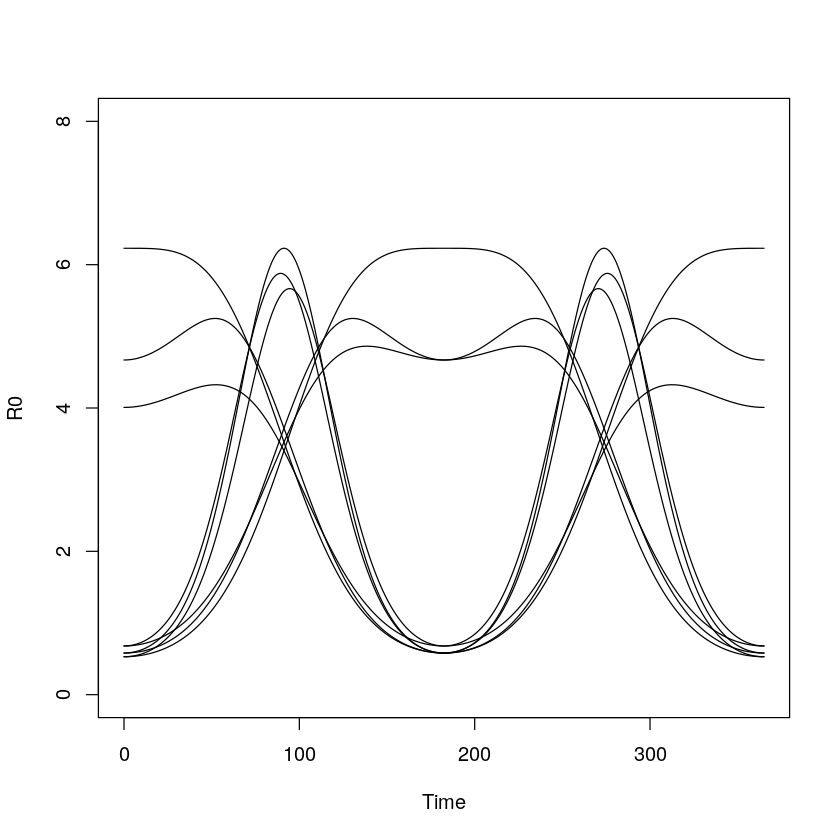

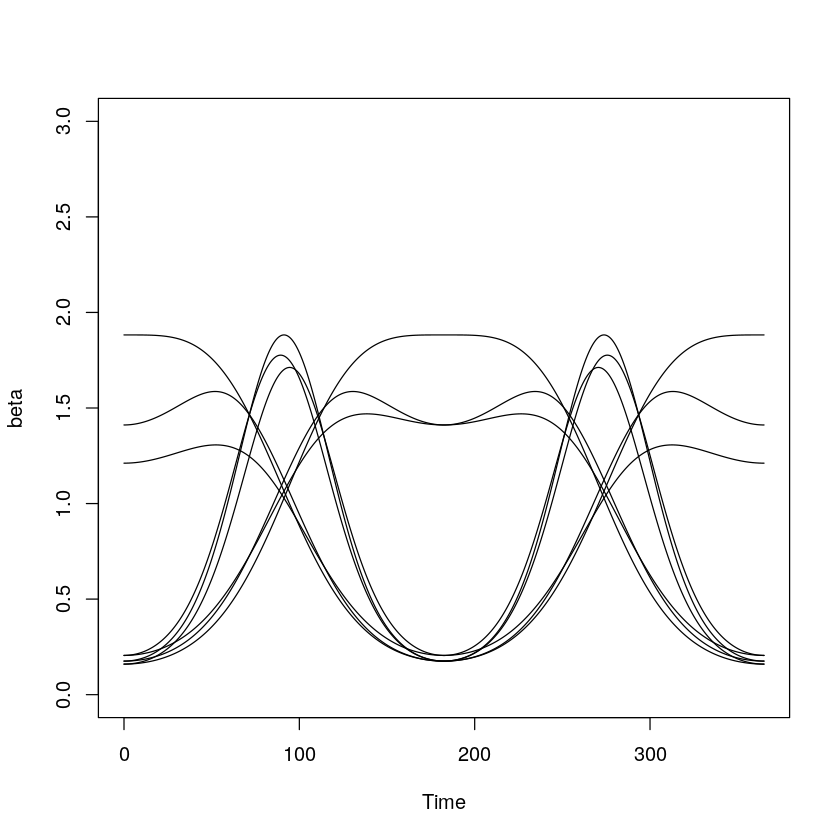

In [19]:
#maxes is a matrix containing different combinations of maxima for s ,d and cr
maxes<-matrix(c(range_C[2],range_C[2],range_C[2],range_C[1],range_C[1],range_C[1],
                range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),range_C[1] + ((range_C[2] - range_C[1]) / 2),
                range_C[1],range_C[2],range_C[2],
                range_C[2],range_C[1],range_C[1],
                range_C[1],range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),
                range_C[2],range_C[1] +((range_C[2] - range_C[1]) / 2), range_C[1] + ((range_C[2] - range_C[1]) / 2),
              range_C[1] +((range_C[2] - range_C[1]) / 2),range_C[1],range_C[1],
              range_C[1] +((range_C[2] - range_C[1]) / 2),range_C[2],range_C[2]),
              byrow=T, nrow=9,ncol=3)
   titles<-c("
    1: all peak at high","
    2: all peak at low","
    3: all peak in midrange_C ","
    4: S peaks low, behaviour peaks high","
    5: S peaks high, behaviour peaks low ","
    6: S peaks low, behaviour peaks mid","
    7: S peaks high, behaviour peaks mid","
    8: S peaks mid, behaviour peaks low","
    9: S peaks mid, behaviour peaks high")

plot_R0_time<-function(maxes,titles,parms,range_C){
#plots R0 as a function of time 
    time<-seq(0,365,by = 0.1)
    #over 1 year
    Climate_Time<-Climate_Function(time,range_C[1], range_C[2],time_at_peak = time_at_peak)
    #this function (defined earlier) finds the climate at a given time based on a sinusoidal function and minimal and maximal climate
    plot(1,type="n",xlim=c(0,365),ylim=c(0,8),xlab="Time",ylab="R0")
    #empty plot
    for (i in 1:nrow(maxes)){  
        
        Max_Coordinates_d[1]<-maxes[i,2]
        Max_Coordinates_cr[1]<-maxes[i,3]
        Max_Coordinates_q[1]<-maxes[i,1]
        #use matrix to set climate for peak 
        R_0<-find_R0_function(Climate=Climate_Time,range_C=range_C,parms=parms, 
                  Maxes=list(Max_Coordinates_cr = Max_Coordinates_cr, Max_Coordinates_d = Max_Coordinates_d,
                             Max_Coordinates_q = Max_Coordinates_q),max_R0_Req="False")
        #find R0 at different times using how climate varies with time
        lines(time,R_0)
        }
}
    
    
plot_R0_time(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0.001,sigma = 0.25,alpha = 0.05,gamma = 0.25),maxes=maxes,titles=titles,range_C=range_C)





plot_beta_time<-function(maxes,titles,parms,range_C){

    time<-seq(0,365,by = 0.1)
    Climate_Time<-Climate_Function(time,range_C[1], range_C[2],time_at_peak = time_at_peak)
    plot(1,type="n",xlim=c(0,365),ylim=c(0,3),xlab="Time",ylab="beta")
    
    for (i in 1:nrow(maxes)){  
        
        Max_Coordinates_d[1]<-maxes[i,2]
        Max_Coordinates_cr[1]<-maxes[i,3]
        Max_Coordinates_q[1]<-maxes[i,1]
        
        beta_value<-find_beta_function(Climate=Climate_Time,range_C=range_C,parms=parms, 
                  Maxes=list(Max_Coordinates_cr = Max_Coordinates_cr, Max_Coordinates_d = Max_Coordinates_d,
                             Max_Coordinates_q = Max_Coordinates_q),max_beta_Req="False")
        lines(time,beta_value)
        }
}
    
    
 plot_beta_time(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0.001,sigma = 0.25,alpha = 0.05,gamma = 0.25),maxes=maxes,titles=titles,range_C=range_C)

In [28]:
R0_time_many<-function(parms,range_C,time,plotting_type, title){
      #plots R0 over time for different maxima 
    
    Climate<- seq(range_C[1], range_C[2] , length.out =5)   
    dataframe<-matrix(nrow=length(Climate)^2*length(time),ncol=8)
   #loops through every climate maxima combination, finds the functions which have these maxima, and uses this to find R0 as a function of time. 
    
   for (behaviour_index in (1:length(Climate))){
       
       #set temp at maximum to the ith point in combined climate
       Max_Coordinates_d[1]<-Climate[behaviour_index]
       
       Max_Coordinates_cr[1]<-Climate[behaviour_index]
       
       for (virus_index in (1:length(Climate))){
            
           #set temp at maximum to the virus index th point in combined climate
            Max_Coordinates_q[1]<-Climate[virus_index]
            #print(rep(abs((Climate[behaviour_index]-Climate[virus_index])/(range_C[2]-range_C[1])),length(index_value))  )
           
            index_value<-(behaviour_index-1)*length(Climate)*length(time)+(virus_index-1)*length(time)+c(1:length(time))
      
            #print(dataframe[min(index_value):max(index_value),1])
            # print(min(index_value):max(index_value))
           Climate_Time<-Climate_Function(time,range_C[1], range_C[2],time_at_peak = time_at_peak)   
            dataframe[index_value,1]<-abs((Climate[behaviour_index]-Climate[virus_index])/(range_C[2]-range_C[1])) 
             dataframe[index_value,2]<-find_R0_function(Climate=Climate_Time,range_C=range_C,parms=parms, 
                  Maxes=list(Max_Coordinates_cr = Max_Coordinates_cr, Max_Coordinates_d = Max_Coordinates_d,
                             Max_Coordinates_q = Max_Coordinates_q),max_R0_Req="False")
            dataframe[index_value,3]<-Max_Coordinates_q[1]
            dataframe[index_value,4]<-Max_Coordinates_d[1]
            dataframe[index_value,5]<-Max_Coordinates_cr[1]
            dataframe[index_value,6]<-time
            dataframe[index_value,7]<-behaviour_index
            dataframe[index_value,8]<-virus_index
        }
    
    }
    dataframe<-as.data.frame(dataframe)
    colnames(dataframe)<-c("Mismatch","R0","MaxT_q","MaxT_d","MaxT_cr","Time","behaviour_climate","virus_climate")      
    if (plotting_type=="ggplot"){
            return(ggplot(data=dataframe,aes(Time,R0,col=Mismatch))+geom_point(size=0.05)+theme_bw() +ggtitle(title)+ylim(low=0,high=max(dataframe[,2])))
    }else{
            return(plot(dataframe[,6],dataframe[,2],cex=0.2, main = title,ylim=c(0,20)))

    }
     
    
}
     

    





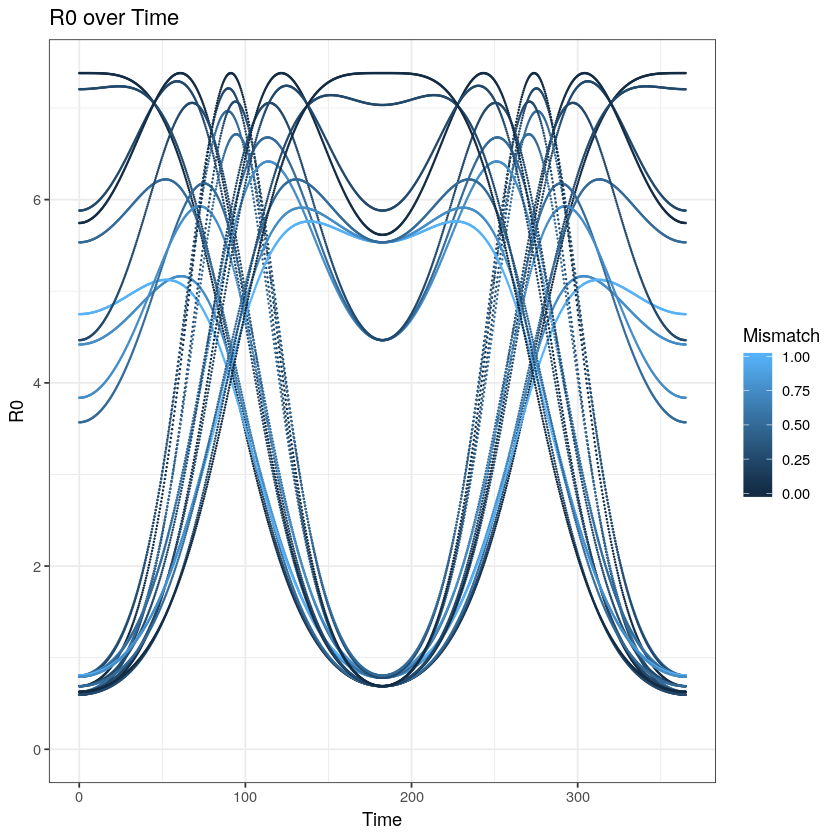

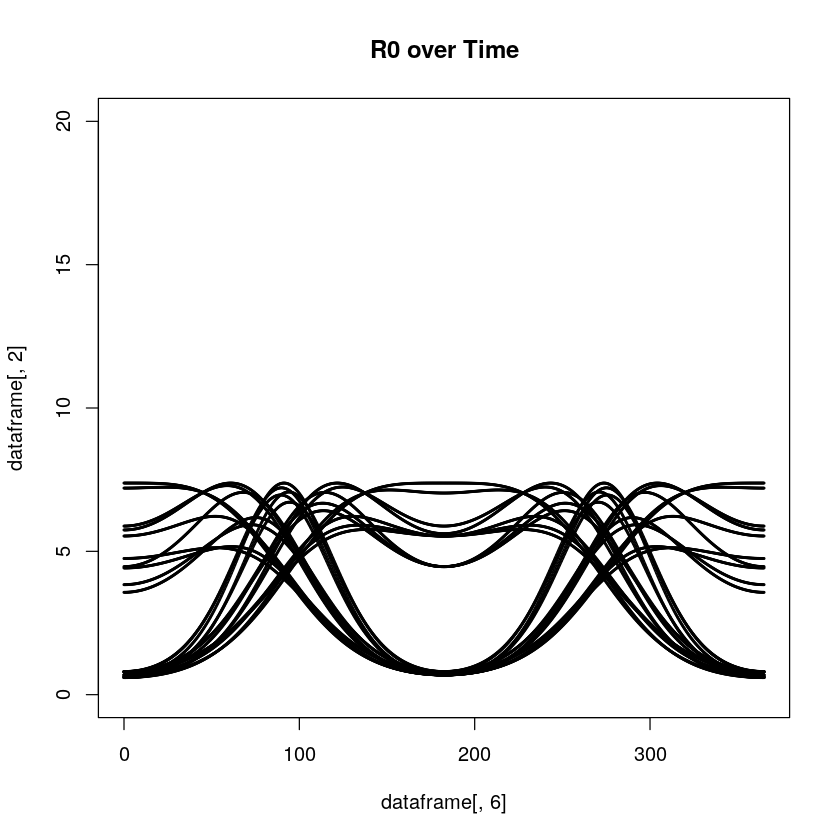

In [29]:
R0_time_many(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C,time=seq(0,365,length.out = 1000), plotting_type="ggplot", title= "R0 over Time")
R0_time_many(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C,time=seq(0,365,length.out = 1000), plotting_type="base", title= "R0 over Time")


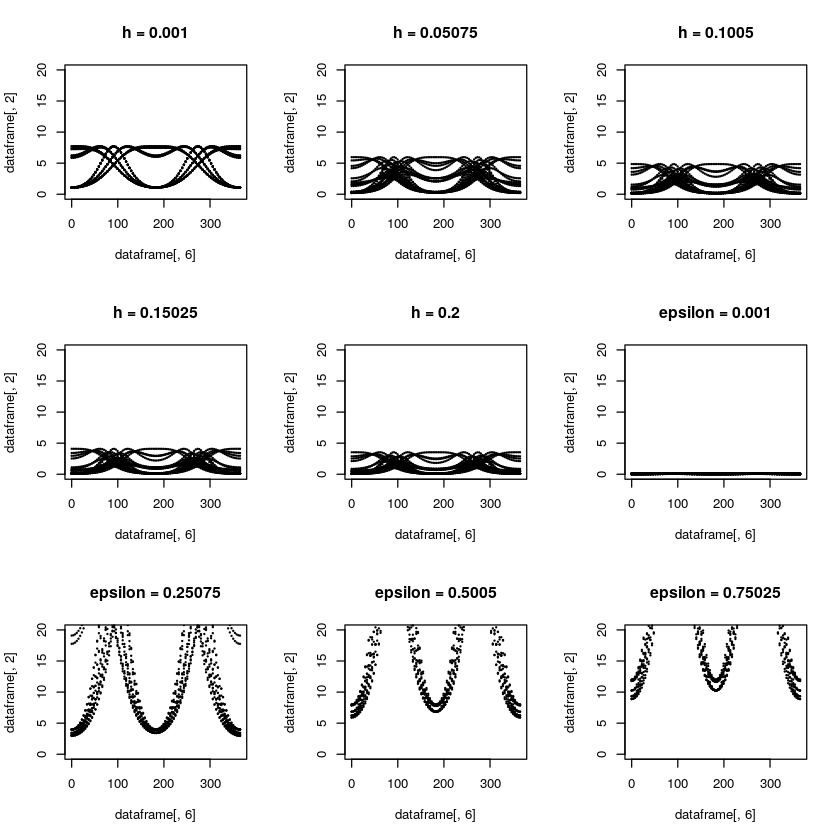

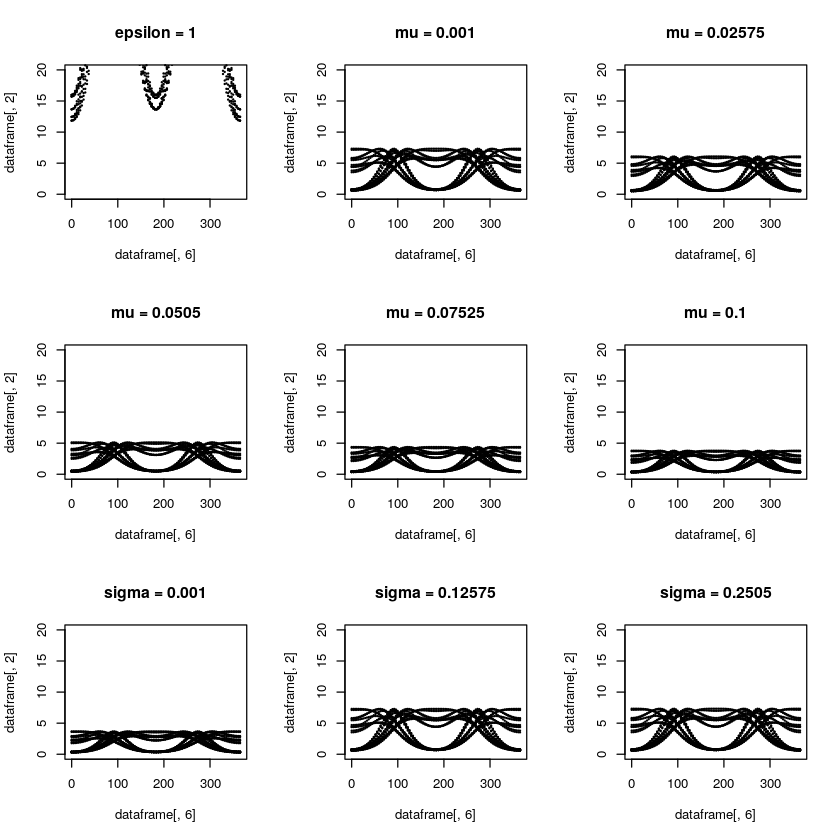

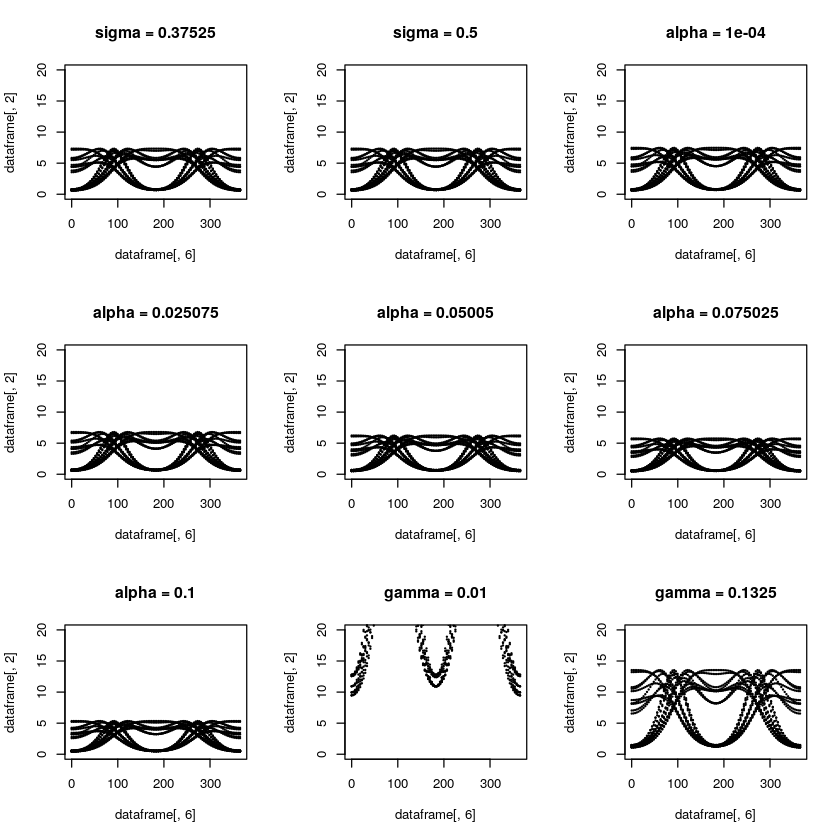

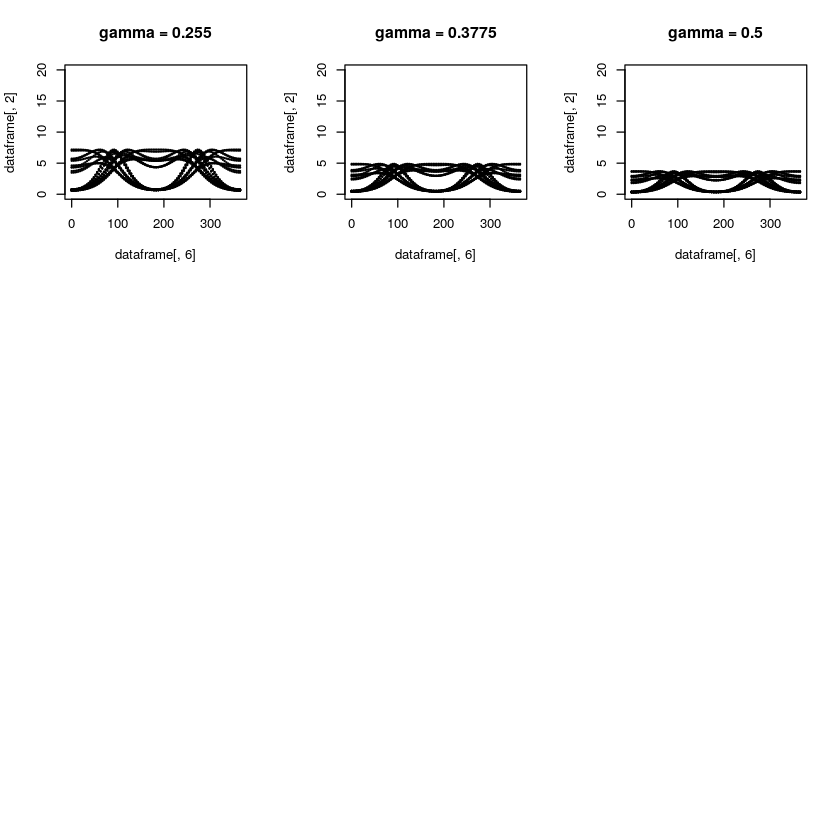

In [32]:
R0_time_many_sensitivity<-function(range_C,initial_parameters,low_parameters,high_parameters){
  par(mfrow=c(3,3))
    #plots many graphs of R0 versus time, with diffe3rent parameter values 
    for (each in names(initial_parameters)){
        parmschange<-parms
        #rename parms
        parmschange[[each]]<-seq(low[[each]],high[[each]],length.out = 5)
        #replace the parameter of interest with a range_C      
        for (i in parmschange[[each]]){
            #loop through range_C and plot R0 time many for each value
            # + title in R0_time_many function??? 
            parmschange[[each]]<-i     
            R0_time_many(parms=parmschange,range_C = range_C,time=seq(0,365,length.out = 100),plotting_type = "base",title = paste(each,"=",i))
        }
    }  
    
}
#++add title
parms=list(h=0.25 / 24,epsilon=0.05,mu = 0.001,sigma = 0.25,alpha = 0.005,gamma = 0.25)
low=list(h=0.001,epsilon=0.001,mu = 0.001,sigma = 0.001,alpha = 0.0001,gamma = 0.01)
high=list(h=0.2,epsilon=1,mu = 0.1,sigma = 0.5,alpha = 0.1,gamma = 0.5)

R0_time_many_sensitivity(range_C,parms, low, high)
#similar to before- h big effect in shape. other parameter large effect on scaling which indludes size of fluctuations


# Removing Cr or D

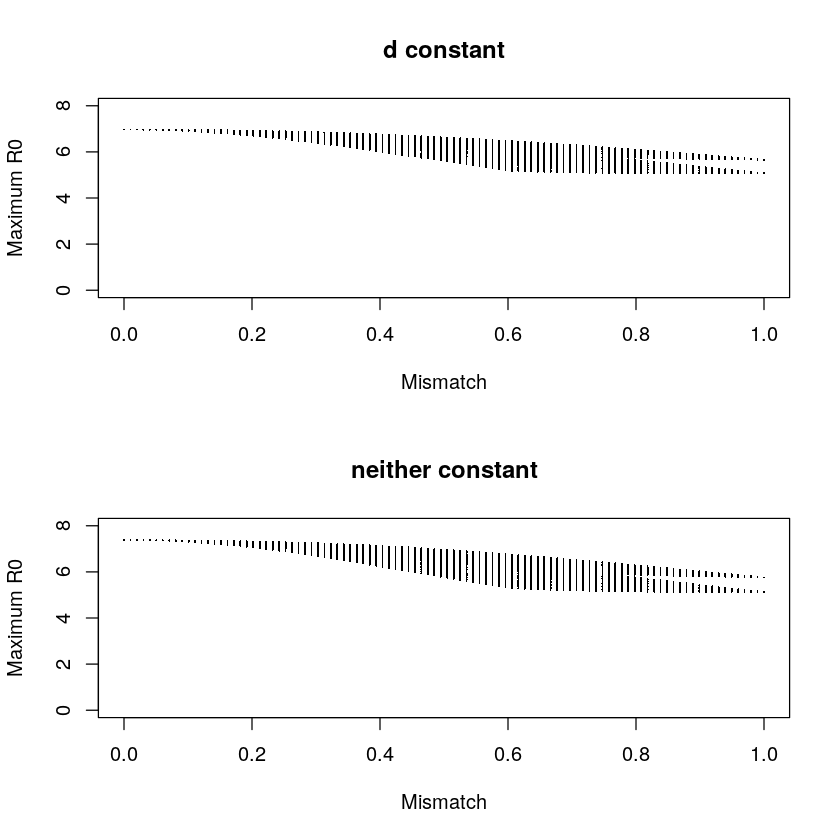

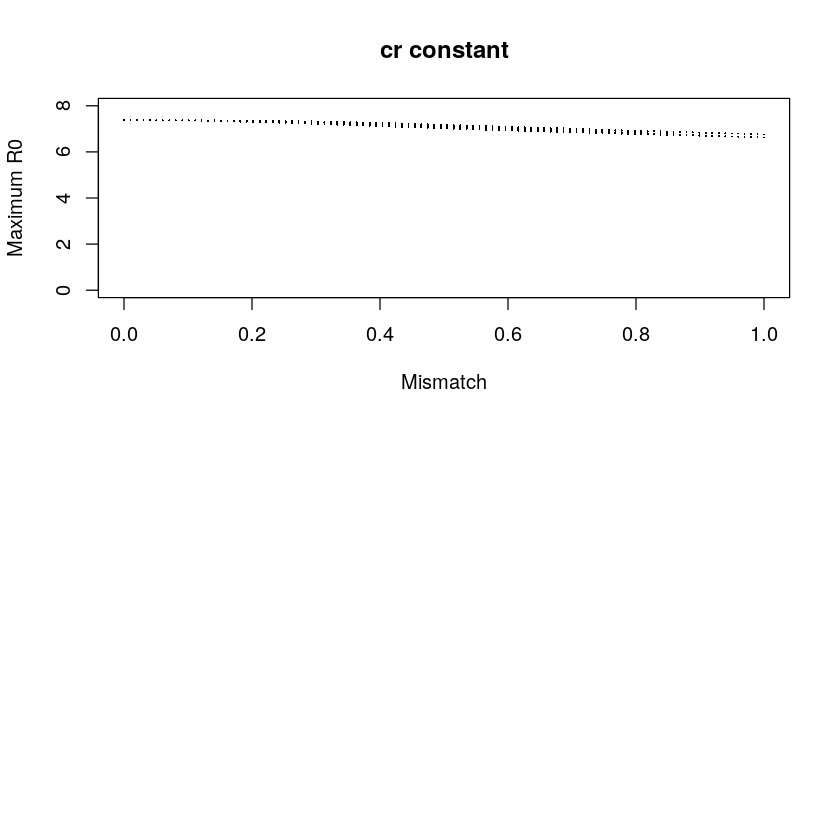

In [40]:
Climate<-seq(range_C[1],range_C[2],length.out = 100)
find_R0_function_switch<-function(Climate,range_C,parms, Maxes, max_R0_Req,climate_dep){
    #very similar to find_R0_function, but climate dependence can be changed
    #finds maximum r0 given temperatures where peak occurs
    #climate_dep- vector for climate dependence of d, cr, and b .
    #if ="y", then use functions below. otherwise value is constant 
    # e.g climate_dep=list(d_value="y", cr_value=40, b_value"y").
    #This only works if a value is provided- if character is used the default is climate dependence for all
    #d_value etc used because assigning names- so need to assign a name that  will be used in beta function
    for (parameter in names(parms)){
        assign(parameter,parms[[parameter]])
    }
    for (Max in names(Maxes)){
        assign(Max,Maxes[[Max]])
    }
    #finds functions, for d , cr and b (if they are all equal to "y")
    d_value= d(Climate =  Climate, Max_Coordinates_d = Max_Coordinates_d, range_C=range_C, quantile_95_d = quantile_95_d )
    cr_value=cr(Climate =  Climate,Max_Coordinates_cr = Max_Coordinates_cr, range_C=range_C, quantile_95_cr = quantile_95_cr)
    b_value= -1 * q(Climate=Climate, range_C=range_C, Max_Coordinates_q = Max_Coordinates_q ,Min_Coordinates_q = Min_Coordinates_q)
    #loop through list
    for (climate_dependence in names(climate_dep)){
        #if the value in the list is a number , assign the number to the name of that list element..
        if (is.numeric(climate_dep[[climate_dependence]])){
            #print(climate_dep[[climate_dependence]])
            assign(x=climate_dependence, value=climate_dep[[climate_dependence]])
            
        }
        
    }
    #beta as a function of time
    beta_value = beta(c_r = cr_value,b =b_value ,d = d_value,h =h ,epsilon =epsilon )

    #below finds the Temp at maximum if required
    # max_R0_req- find all  R or just max?
    #Climate[which.max((sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma))]
    if (max_R0_Req =="True"){
        return(max((sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma)))  
    }else{
        return(c((sigma / (sigma + mu)) * beta_value/(mu + alpha + gamma)))  
    }
}
#find_R0_function_switch(Climate = Climate,range_C=range_C, parms=parms, 
 #                 Maxes=list(Max_Coordinates_cr = Max_Coordinates_cr, Max_Coordinates_d = Max_Coordinates_d,
  #                           Max_Coordinates_q = Max_Coordinates_q),max_R0_Req="F",climate_dep=list(d_value=0.25/24,b_value="y",cr_value="y") )



plot_R0_mismatch_basic_switch<-function(parms ,range_C, title ,climate_dep){
     #plot max R0 vs mismatch where climate dependence of different variable can be controlled
    Climate<- seq(range_C[1], range_C[2] , length.out = 100)
    
    R0<-matrix(nrow=length(Climate),ncol=length(Climate))
   
    Mismatch<-matrix(nrow=length(Climate),ncol=length(Climate))
   
    #loops through combinations where there is different levels of mismatch, finds and stores max R0 and Mismatch at these values
   for (behaviour_index in (1:length(Climate))){
       #set temp at maximum to the ith point in combined climate
       Max_Coordinates_d[1]<-Climate[behaviour_index]
       Max_Coordinates_cr[1]<-Climate[behaviour_index]
       
       
       for (virus_index in (1:length(Climate))){
            #set temp at maximum to the virus index th point in combined climate
            Max_Coordinates_q[1]<-Climate[virus_index]
            
            R0[ behaviour_index,virus_index]<-find_R0_function_switch(Climate=Climate,range_C=range_C,parms=parms, 
                  Maxes=list(Max_Coordinates_cr = Max_Coordinates_cr, Max_Coordinates_d = Max_Coordinates_d,
                             Max_Coordinates_q = Max_Coordinates_q),max_R0_Req="True", climate_dep=climate_dep)
            Mismatch[ behaviour_index,virus_index]<-abs((Climate[behaviour_index]-Climate[virus_index])/(range_C[2]-range_C[1]))            
        }
    
    }
   
    plot(Mismatch, R0,pch=16,cex=0.2,xlab="Mismatch",ylab="Maximum R0", main = title, ylim=c(0,8))      
}
    
 par(mfrow=c(2,1))
plot_R0_mismatch_basic_switch(parms=list(h=0.25/24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),
                              range_C = range_C, title="d constant",climate_dep=list(d_value=2/24,b_value="y",cr_value="y"))
plot_R0_mismatch_basic_switch(parms=list(h=0.25/24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C, title="neither constant",climate_dep=list(d_value="y",b_value="y",cr_value="y"))

plot_R0_mismatch_basic_switch(parms=list(h=0.25/24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C, title="cr constant",climate_dep=list(d_value="y",b_value="y",cr_value=40))




#making cr constant changes the shape 


#what about d constant effect of changing h - same effect




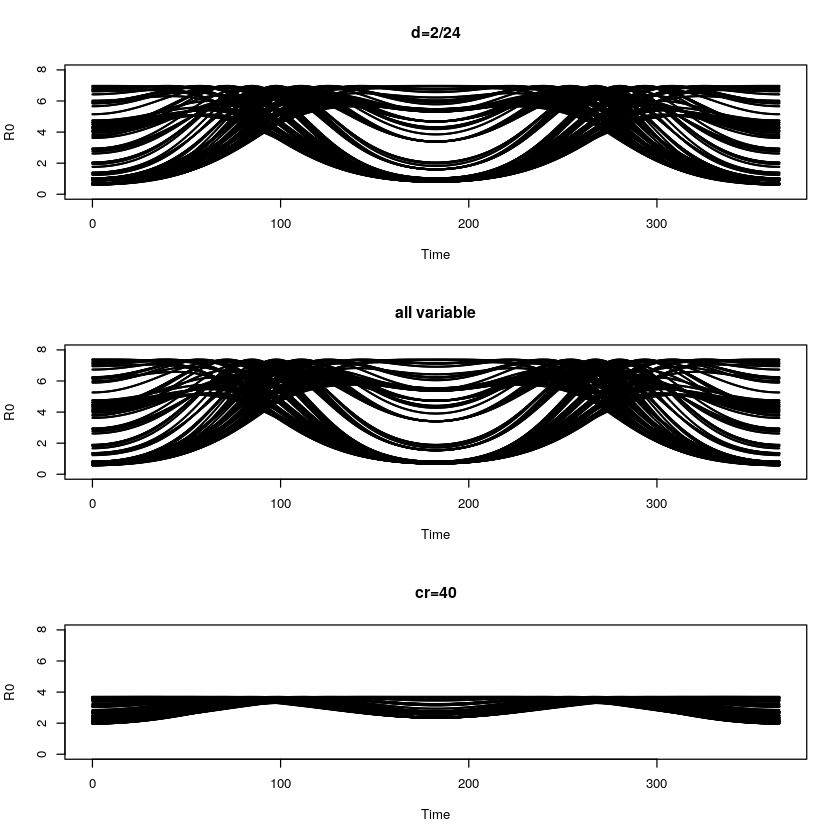

In [41]:
R0_time_many_switch<-function(parms,range_C,time,plotting_type,climate_dep,title){
    #finds R0 as a function of time  when climate depends on time.
    #for each plot, plots multiple series, each representing a different combination of:
    #climate where virus survival is maximal and where human behaviour peaks
    
    Climate<- seq(range_C[1], range_C[2] , length.out = 10)   
    dataframe<-matrix(nrow=length(Climate)^2*length(time),ncol=8)
    #loops through every climate maxima combination, finds functions which have these maxima, and uses this to find R0 as a function of time. 
    # the max of this is stored
    
   for (behaviour_index in (1:length(Climate))){
       
       #set temp at maximum to the ith point in combined climate
       Max_Coordinates_d[1]<-Climate[behaviour_index]
       
       Max_Coordinates_cr[1]<-Climate[behaviour_index]
       
       for (virus_index in (1:length(Climate))){
            
           #set temp at maximum to the virus index th point in combined climate
            Max_Coordinates_q[1]<-Climate[virus_index]
           
            index_value<-(behaviour_index-1)*length(Climate)*length(time)+(virus_index-1)*length(time)+c(1:length(time))
      
     
            Climate_Time<-Climate_Function(time,range_C[1], range_C[2],time_at_peak = time_at_peak)   
            dataframe[index_value,1]<-abs((Climate[behaviour_index]-Climate[virus_index])/(range_C[2]-range_C[1])) 
            dataframe[index_value,2]<-find_R0_function_switch(Climate=Climate_Time,range_C=range_C,parms=parms, 
                  Maxes=list(Max_Coordinates_cr = Max_Coordinates_cr, Max_Coordinates_d = Max_Coordinates_d,
                             Max_Coordinates_q = Max_Coordinates_q),max_R0_Req="False", climate_dep=climate_dep)
            dataframe[index_value,3]<-Max_Coordinates_q[1]
            dataframe[index_value,4]<-Max_Coordinates_d[1]
            dataframe[index_value,5]<-Max_Coordinates_cr[1]
            dataframe[index_value,6]<-time
            dataframe[index_value,7]<-behaviour_index
            dataframe[index_value,8]<-virus_index
        }
    
    }
    dataframe<-as.data.frame(dataframe)
    colnames(dataframe)<-c("Mismatch","R0","MaxT_q","MaxT_d","MaxT_cr","Time","behaviour_climate","virus_climate")      
    if (plotting_type=="ggplot"){
            ggplot(data=dataframe,aes(Time,R0,col=Mismatch))+geom_point(size=0.1)+theme_bw() 

    }else{
            plot(dataframe[,6],dataframe[,2],cex=0.1,ylim=c(0,8),xlab="Time",ylab="R0",main=title)

    }
     
    
}
     
par(mfrow=c(3,1))
    
R0_time_many_switch(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C,time=seq(0,365,length.out = 1000), plotting_type="base", climate_dep=list(d_value=2/24,b_value="y", cr_value="y"),title="d=2/24")
R0_time_many_switch(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C,time=seq(0,365,length.out = 1000), plotting_type="base", climate_dep=list(d_value="y",b_value="y", cr_value="y"),title="all variable")
R0_time_many_switch(parms=list(h=0.25 / 24,epsilon=0.05,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C,time=seq(0,365,length.out = 1000), plotting_type="base", climate_dep=list(d_value="y",b_value="y", cr_value=20),title="cr=40")

#again, making cr constant has a big effect, but making duration constant does not. can we remove duration?


# Comparing Countries


In [288]:

Countries<-matrix(nrow=9,ncol=3, byrow=T,c(5,19,365/2,-3,21,365/2,10,24,365/2,13,22,0,25.2,28.6,365/4,14.2,34.3,365/2,17,23,365/12,8,33,7*365/12,26,27,365/2))
#this is to get an idea, need more accurate numbers! just off random weather sites
colnames(Countries)<-c("range_C[1]","range_C[2]","time at peak")
rownames(Countries)<-c("London","Toronto","Barcelona","Sydney","Lagos","Delhi","Lima","Wuhan","Port of Spain, Trinidad and Tobago")
#par(mfrow=c(1,2))
Countries
for (i in 1:nrow(Countries)){
Country=rownames(Countries)[i]
    range_C=c(Countries[i,1],Countries[i,2])
    time_at_peak<-Countries[i,3]
    png(paste0("../../Results/Countries/",Country,"_Mismatch",".png"))
    print(plot_R0_mismatch_ggplot(parms=list(h=0.25 / 24,epsilon=0.03,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C,title=Country))
    dev.off()
    png(paste0("../../Results/Countries/",Country,"_Time",".png"))
    print(R0_time_many(parms=list(h=0.25 / 24,epsilon=0.03,mu = 0,sigma = 0.25,alpha = 0.005,gamma = 0.25),range_C = range_C,time=seq(0,365,length.out = 1000), plotting_type="ggplot",title=Country))
    dev.off()
}


,range[1],range[2],time at peak
London,5.0,19.0,182.50000
Toronto,-3.0,21.0,182.50000
Barcelona,10.0,24.0,182.50000
Sydney,13.0,22.0,0.00000
Lagos,25.2,28.6,91.25000
Delhi,14.2,34.3,182.50000
Lima,17.0,23.0,30.41667
Wuhan,8.0,33.0,212.91667
"Port of Spain, Trinidad and Tobago",26.0,27.0,182.50000


|Parameter|Meaning|Unit|Origin|
|------|------|------|------|
|$\alpha$     |rate of disease induced mortality (per capita?)   |unit time$^{-1}$  |Bjørnstad 2018|
|$\beta$     |transmission rate per infective    | individiaul/(individual x unit time)$^{-1}$   |Keeling and Rohani 2007|
|$\gamma$     |recovery rate - probably of recovery for an individual per unit time (reciprocal of infectious period)   |unit time$^{-1}$  |Keeling and Rohani 2007|
|$\mu$    |natural per capita death rate -not caused by disease|unit time$^{-1}$    |Keeling and Rohani 2007|
|$\nu$    |natural per capita birth rate |unit time$^{-1}$  |Keeling and Rohani 2007|
|$\sigma$     |rate of movement from E to I (reciprocal of latent period)|unit time$^{-1}$|  Keeling and Rohani 2007|
|$S$     |number of susceptibles    |  individuals |Keeling and Rohani 2007|
|$E$     |number of exposed |  individuals  |Keeling and Rohani 2007|
|$I$     |number of infected     |  individuals |Keeling and Rohani 2007|
|$R$     |number of recovered    | individuals |Keeling and Rohani 2007|
|$N$     |number of individauls   | individuals |Keeling and Rohani 2007|
|$T$  |temperature |degrees c|-|
|$RH$   |relative humidity|%|-|
|$m$ |containment parameter|-|Neher 2020|
|$k$   |inflection point of Hill function||Neher 2020|
|$H$  |dimensionless hill function- containment |-|Neher 2020|
|$d$  |average contact duration|unit time|-|
|$s$  |Standard distribution of normal distribution|-|-|
|$m_T$,$m_d$ |Temperature and duration at maximum duration |degrees C, unit time|-|
|$c_l$,$c_u$|lower, upper interval at which 95\%  of the duration is likely to occur |-|-|
|$q$   |viral rate of growth|$time^{-1}$||
|$c_r$ |contact rate per unit time  |(individuals/(individual x time)|valle 2013|  
|$\epsilon$|proportion of contacts that can cause transmission|proportion|valle 2013|
|$\tau$ |the susceptibility of the susceptible|proportion|valle 2013|  
|$\zeta$| the number of transmission events per unit time| (1/time)|valle 2013|  
|d | average contact duration of a contact| (time) |valle 2013|    
|V |the net amount of virus per individual shedding |(titre/individual) || 
|a| the amount of virus shed per individual per unit time |(titre/(time x individual)  ||
|b | the rate of decay of the virus| (1/time)|-q|  
|h | the expected duration of contact needed for tramsmission| (time)| (inverse of $\zeta$)|





units calculated from:  
units of de/dt,ds/st,di/dt, dr/dt$N\times$unit time$^{-1}$ 


##  Generic Climate

Current plan is do analysis with Temperature, than repeat with humidity


Currently climate is included through its effect on cr, d and q through:
- range_C- which is used to simulate different maxima
- confidence intervals for d and cr
- Max_Coordinates_ [1] - the climate value where the maximum q,d, or cr occurs
- (Max_Coordinates_ [2] - the maxima (and minima for q) -  can be modified regardless of the range_C and confidence interval ) 

It would be possible to set range_C and confidence intervals s.t. the values aren't meaningful. eg range_C is between 0 and 100. and then set  climate maxima so there are different levels of mismatch. 
However to meaningfully parameterise rather then explore different combinations, both temperature and humidity would need to be included:
- Climate is a function of time , and d,b,cr are functions of climate
- Climate=C_C(T,RH)=$c_1 T + c_2RH + c_3T \times RH $ - linear combination of RH and T with interaction term
    - How would I parameterise this!- so equal contribution? scale?
    - Is a linear combination likely/possible
    - unsure if this would differentiate between high temperature and high humidity. does this matter
    - may well be a better way to do this
    
- range_C, confidence intervals, Max_Coordinates_ [1]
    - Climate is found by applying $c_1 T + c_2RH$ to required temperatures and humidities
    -  The climate at maxima and minimima are applied by applying $c_1 T + c_2RH$ to temperature and humidity where the value is highest or lowest (from appropriate literature)
    - The confidence interval and range_C could be estimated by finding the maximum and minimum values of C possible/feasible from $c_1 T + c_2RH$ and data 
- Climate_Function(time,max,min)
    - max and min are found by applying $c_1 T + c_2RH$ temp and humidity and min and max
    - time is the time range_C over which to apply sinusoidal climate function
    - may also need to incorporate a shift
    
